In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#问题生成
testsize=10
def QuestionGenerate(n,p):#未设置λ
    A,x,b=[],[],[]
    for i in range(testsize):
        np.random.seed(i)
        A.append((np.random.rand(n, p)-0.5)*10)
        x.append(np.random.randint(-10, 10, (p, 1)))
        b.append(np.dot(A[i],x[i]))
    return A,x,b
#优化算法函数
def SubGradMethod(A,b,Lambda):
    Accuracy,Time,F=[],[],[]
    for i in range(10):
        p=len(A[0][0])
        Accuracy.append([])
        Time.append([])
        F.append([])
        time,x1,f_star=0,np.full((p,1),0),10000000
        Miu=max(np.linalg.eig(np.dot(A[i],A[i].T))[0])
        A1,b1=A[i],b[i]
        while  time<40000:
            time+=1
            SubGrad1=np.full((p,1),0)
            for j in range(p):
                if x1[j][0]>0:
                    SubGrad1[j][0]=1
                elif x1[j][0]<-0:
                    SubGrad1[j][0]=-1
                else:
                    SubGrad1[j][0]=0
            SubGrad2=np.dot(A1.T,np.dot(A1,x1)-b1)+Lambda*SubGrad1
            x1=x1-(1/(time+Miu))*SubGrad2
            f=0.5*np.linalg.norm(np.dot(A1,x1)-b1, ord=2, axis=None, keepdims=False)+Lambda*np.linalg.norm(x1, ord=1, axis=None, keepdims=False)
            if f<f_star:
                f_star=f
        time,x1,change=0,np.full((p,1),0.01),10000
        while  time<10000:
            time+=1
            SubGrad1=np.full((p,1),0)
            for j in range(p):
                if x1[j][0]>0.0001:
                    SubGrad1[j][0]=1
                elif x1[j][0]<-0.0001:
                    SubGrad1[j][0]=-1
                else:
                    SubGrad1[j][0]=0
            SubGrad2=np.dot(A1.T,np.dot(A1,x1)-b1)+Lambda*SubGrad1
            x1=x1-(1/(time+Miu))*SubGrad2
            f=0.5*np.linalg.norm(np.dot(A1,x1)-b1, ord=2, axis=None, keepdims=False)+Lambda*np.linalg.norm(x1, ord=1, axis=None, keepdims=False)
            F[i].append(f)
            if f==f_star:
                Accuracy[i].append(Accuracy[i][time-2]-3)
            else:
                Accuracy[i].append(np.log10((f-f_star)/f_star))
            Time[i].append(time)
    return Accuracy,Time,F
def ProximalGradMethod(A,b,Lambda):
    Accuracy,Time,F=[],[],[]
    for i in range(10):
        p=len(A[0][0])
        Accuracy.append([])
        Time.append([])
        F.append([])
        time,x1,f_star=0,np.full((p,1),0),1000000
        Miu=1/max(np.linalg.eig(np.dot(A[i],A[i].T))[0])
        A1,b1=A[i],b[i]
        while  time<40000:
            time+=1
            Grad=np.dot(A1.T,np.dot(A1,x1)-b1)
            y1=x1-Miu*Grad
            x1_star=np.sign(y1)*np.maximum(np.abs(y1)-Lambda*Miu,0)
            x1=x1_star
            f=np.linalg.norm(0.5*(np.dot(A1,x1)-b1), ord=2, axis=None, keepdims=False)+Lambda*np.linalg.norm(x1, ord=1, axis=None, keepdims=False)
            if f<f_star:
                f_star=f
        time,x1=0,np.full((p,1),0)
        while  time<10000:
            time+=1
            Grad=np.dot(A1.T,np.dot(A1,x1)-b1)
            y1=x1-Miu*Grad
            x1_star=np.sign(y1)*np.maximum(np.abs(y1)-Lambda*Miu,0)
            x1=x1_star
            f=np.linalg.norm(0.5*(np.dot(A1,x1)-b1), ord=2, axis=None, keepdims=False)+Lambda*np.linalg.norm(x1, ord=1, axis=None, keepdims=False)
            F[i].append(f)
            if f==f_star:
                Accuracy[i].append(Accuracy[i][time-2]-3)
            else:
                Accuracy[i].append(np.log10((f-f_star)/f_star))
            Time[i].append(time)
    return Accuracy,Time,F
def ADMM(A,b,Lambda):
    Accuracy,Time,F,Rou=[],[],[],0.1
    for i in range(10):
        p=len(A[0][0])
        Accuracy.append([])
        Time.append([])
        F.append([])
        time,x1,z,y,f_star=0,np.full((p,1),0),np.full((p,1),0),np.full((p,1),0),1000000
        A1,b1=A[i],b[i]
        Miu=1/max(np.linalg.eig(np.dot(A1,A1.T))[0])
        Rev=np.linalg.inv(np.dot(A1.T,A1)+Rou*np.eye(p))
        while  time<40000:
            f=np.linalg.norm(0.5*(np.dot(A1,x1)-b1), ord=2, axis=None, keepdims=False)+Lambda*np.linalg.norm(x1, ord=1, axis=None, keepdims=False)
            F[i].append(f)
            time+=1
            x1=np.dot(Rev,np.dot(A1.T,b1)+Rou*(z-y))
            z=np.sign(x1+Rou*y)*np.maximum(np.abs(x1+Rou*y)-Miu/Rou,0)
            y=y+x1-z
            if f<f_star:
                f_star=f
        time,x1,z,y=0,np.full((p,1),0),np.full((p,1),0),np.full((p,1),0)
        while  time<10000:
            f=np.linalg.norm(0.5*(np.dot(A1,x1)-b1), ord=2, axis=None, keepdims=False)+Lambda*np.linalg.norm(x1, ord=1, axis=None, keepdims=False)
            time+=1
            x1=np.dot(Rev,np.dot(A1.T,b1)+Rou*(z-y))
            z=np.sign(x1+Rou*y)*np.maximum(np.abs(x1+Rou*y)-Miu/Rou,0)
            y=y+x1-z
            if f==f_star:
                Accuracy[i].append(Accuracy[i][time-2]-3)
            else:
                Accuracy[i].append(np.log10((f-f_star)/f_star))
            Time[i].append(time)
    return Accuracy,Time,F

#可视化图像函数
def plotADMM(Accuracy,Time,F,n,p):
    plt.figure(figsize=(48, 20))
    plt.title("对于n = " + str(n)+",p = " + str(p) + "的Lasso问题的ADMM迭代结果:")
    plt.ylabel("log10(f^k-f*)/f*")
    plt.xlabel("k")
    for i in range(testsize):
        plt.plot(Time[i][:99],Accuracy[i][:99],"#00"+str(hex(25*i+25))[2:]+str(hex(25*i+25))[2:])
    plt.figure(figsize=(24, 10))
    plt.title("对于n = " + str(n)+",p = " + str(p) + "的Lasso问题的ADMM迭代结果:")
    plt.ylabel("||Ax^k-b||^2+λ|x|")
    plt.xlabel("k")
    for i in range(testsize):
        plt.plot(Time[i][:100],F[i][:100],"#00"+str(hex(25*i+25))[2:]+str(hex(25*i+25))[2:])
def plot(Accuracy,Time,F,n,p,Method):
    plt.figure(figsize=(48, 20))
    plt.title("对于n = " + str(n)+",p = " + str(p) + "的Lasso问题的" + str(Method) + "迭代结果:")
    plt.ylabel("log10(f^k-f*)/f*")
    plt.xlabel("k")
    for i in range(testsize):
        plt.plot(Time[i],Accuracy[i],"#00"+str(hex(25*i+25))[2:]+str(hex(25*i+25))[2:])
    plt.figure(figsize=(24, 10))
    plt.title("对于n = " + str(n)+",p = " + str(p) + "的Lasso问题的" + str(Method) + "迭代结果:")
    plt.ylabel("||Ax^k-b||^2+λ|x|")
    plt.xlabel("k")
    for i in range(testsize):
        plt.plot(Time[i],F[i],"#00"+str(hex(25*i+25))[2:]+str(hex(25*i+25))[2:])

图像会在运行结束后一起出现


C:\Users\wengy\AppData\Local\Temp\ipykernel_34252\2890437674.py:55: RuntimeWarning: invalid value encountered in log10
  Accuracy[i].append(np.log10((f-f_star)/f_star))


对于n = 10,p = 5的Lasso问题的次梯度法迭代结果:
对于n = 10,p = 5的Lasso问题的临近点梯度法迭代结果:
对于n = 10,p = 5的Lasso问题的ADMM迭代结果:
对于n = 100,p = 5的Lasso问题的次梯度法迭代结果:
对于n = 100,p = 5的Lasso问题的临近点梯度法迭代结果:
对于n = 100,p = 5的Lasso问题的ADMM迭代结果:
对于n = 10,p = 50的Lasso问题的次梯度法迭代结果:
对于n = 10,p = 50的Lasso问题的临近点梯度法迭代结果:
对于n = 10,p = 50的Lasso问题的ADMM迭代结果:
对于n = 10,p = 500的Lasso问题的次梯度法迭代结果:
对于n = 10,p = 500的Lasso问题的临近点梯度法迭代结果:


C:\Users\wengy\AppData\Local\Temp\ipykernel_34252\2890437674.py:141: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(48, 20))


对于n = 10,p = 500的Lasso问题的ADMM迭代结果:


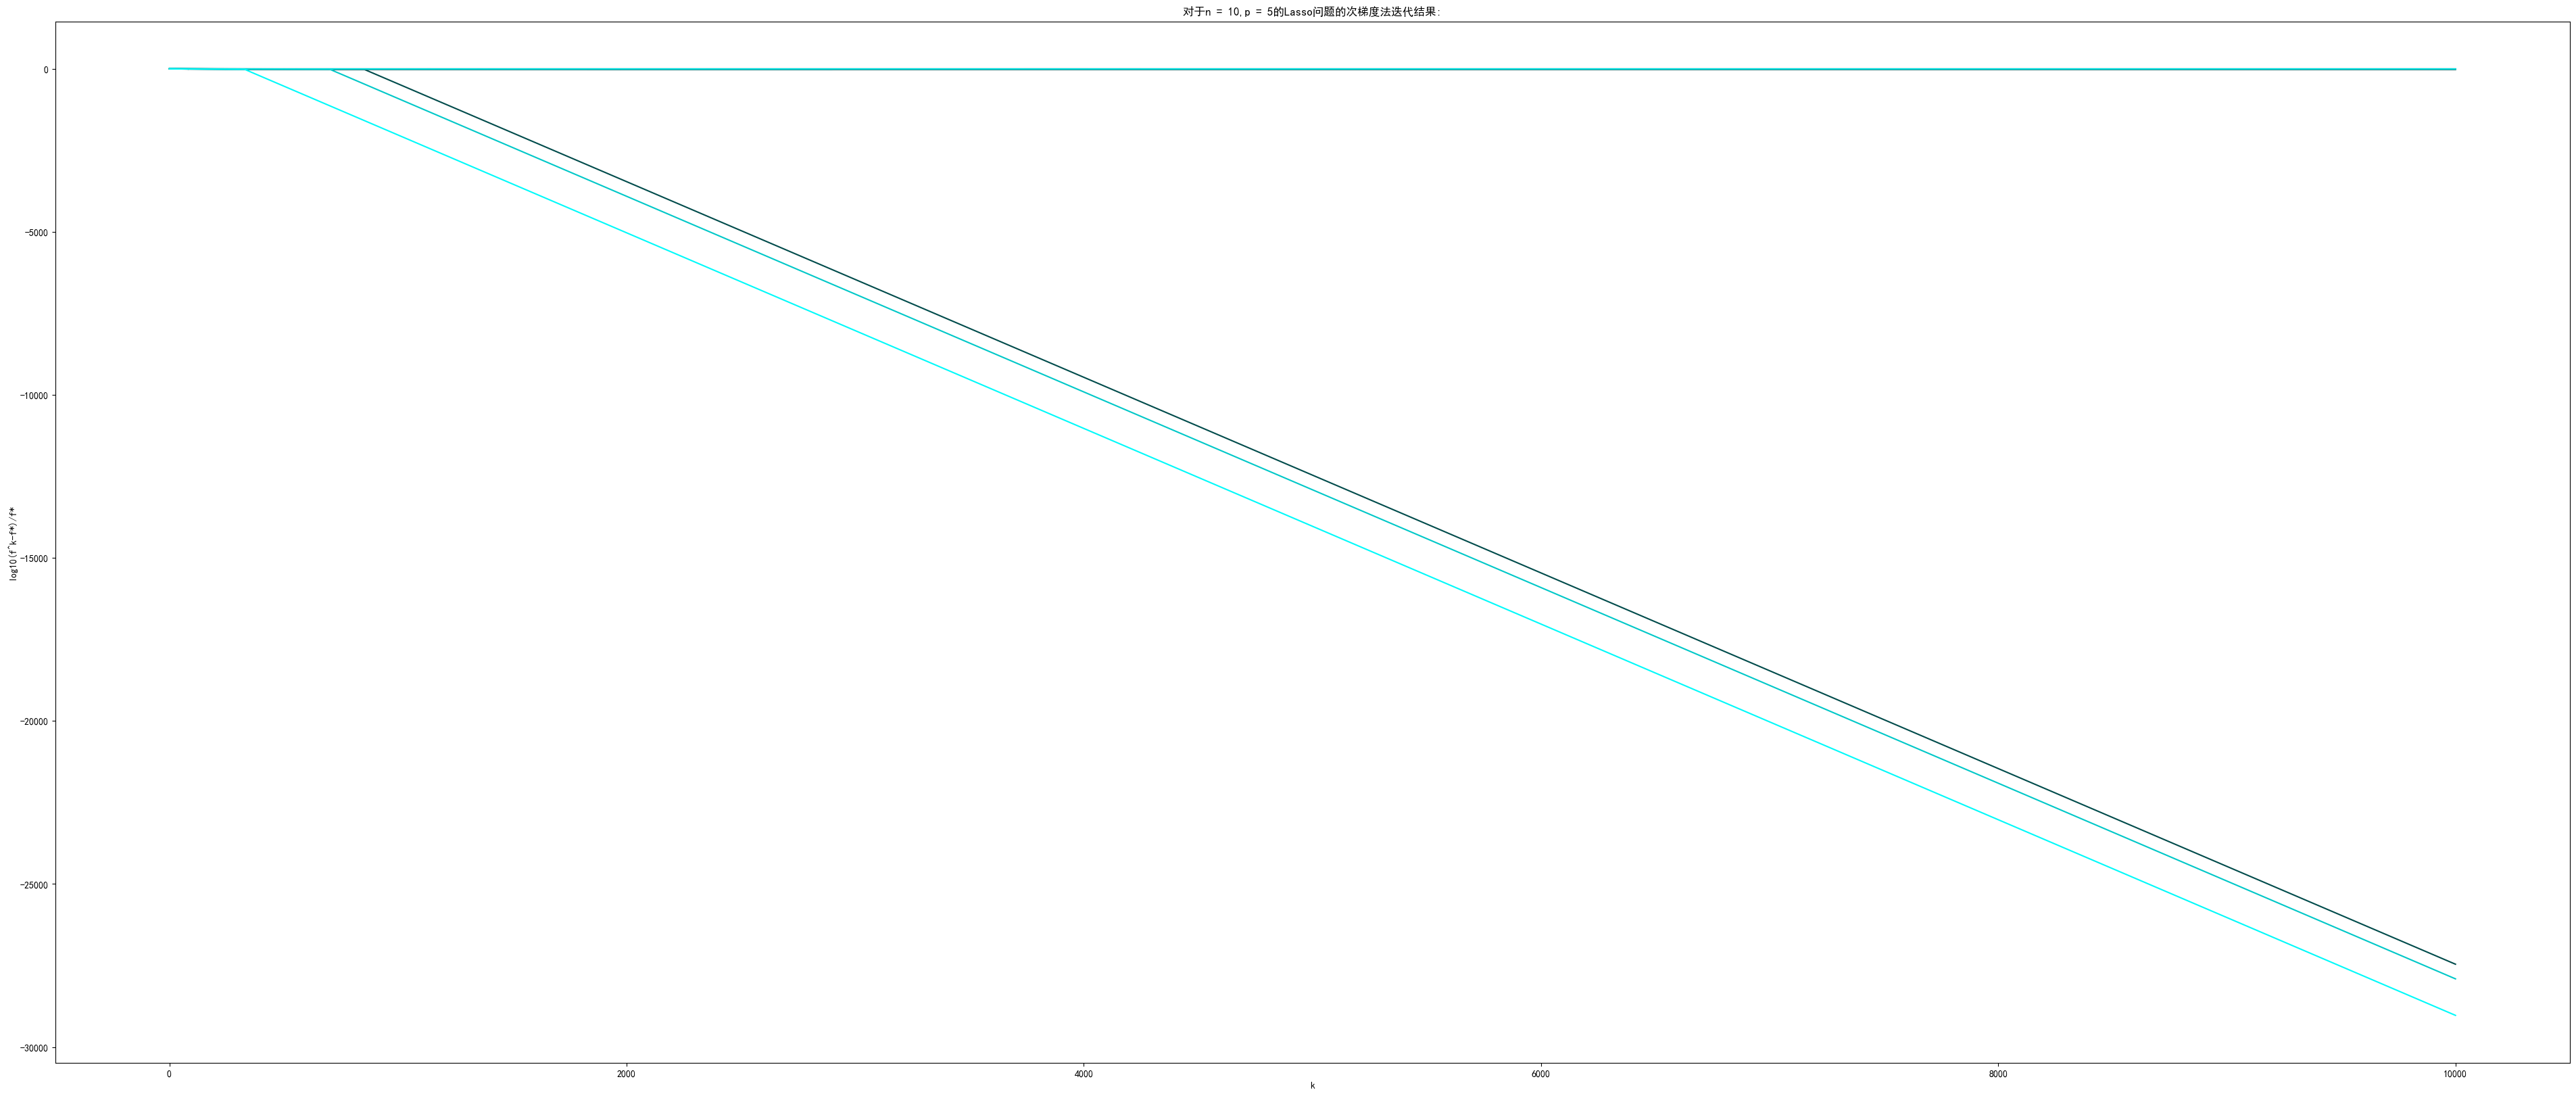

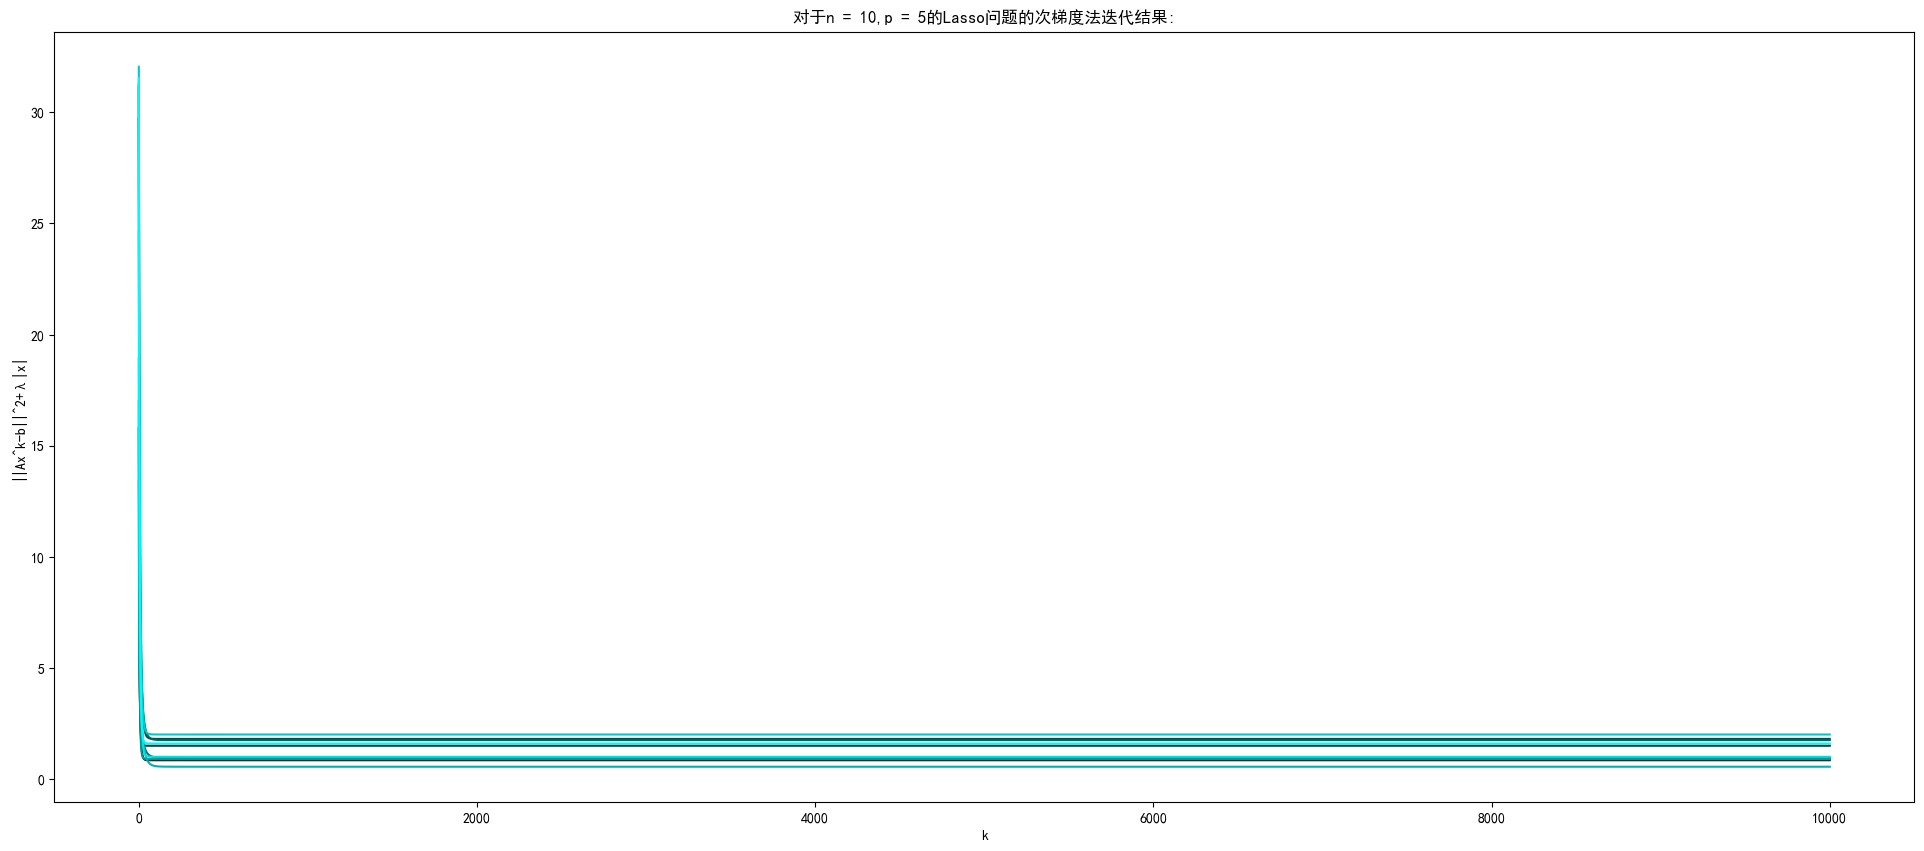

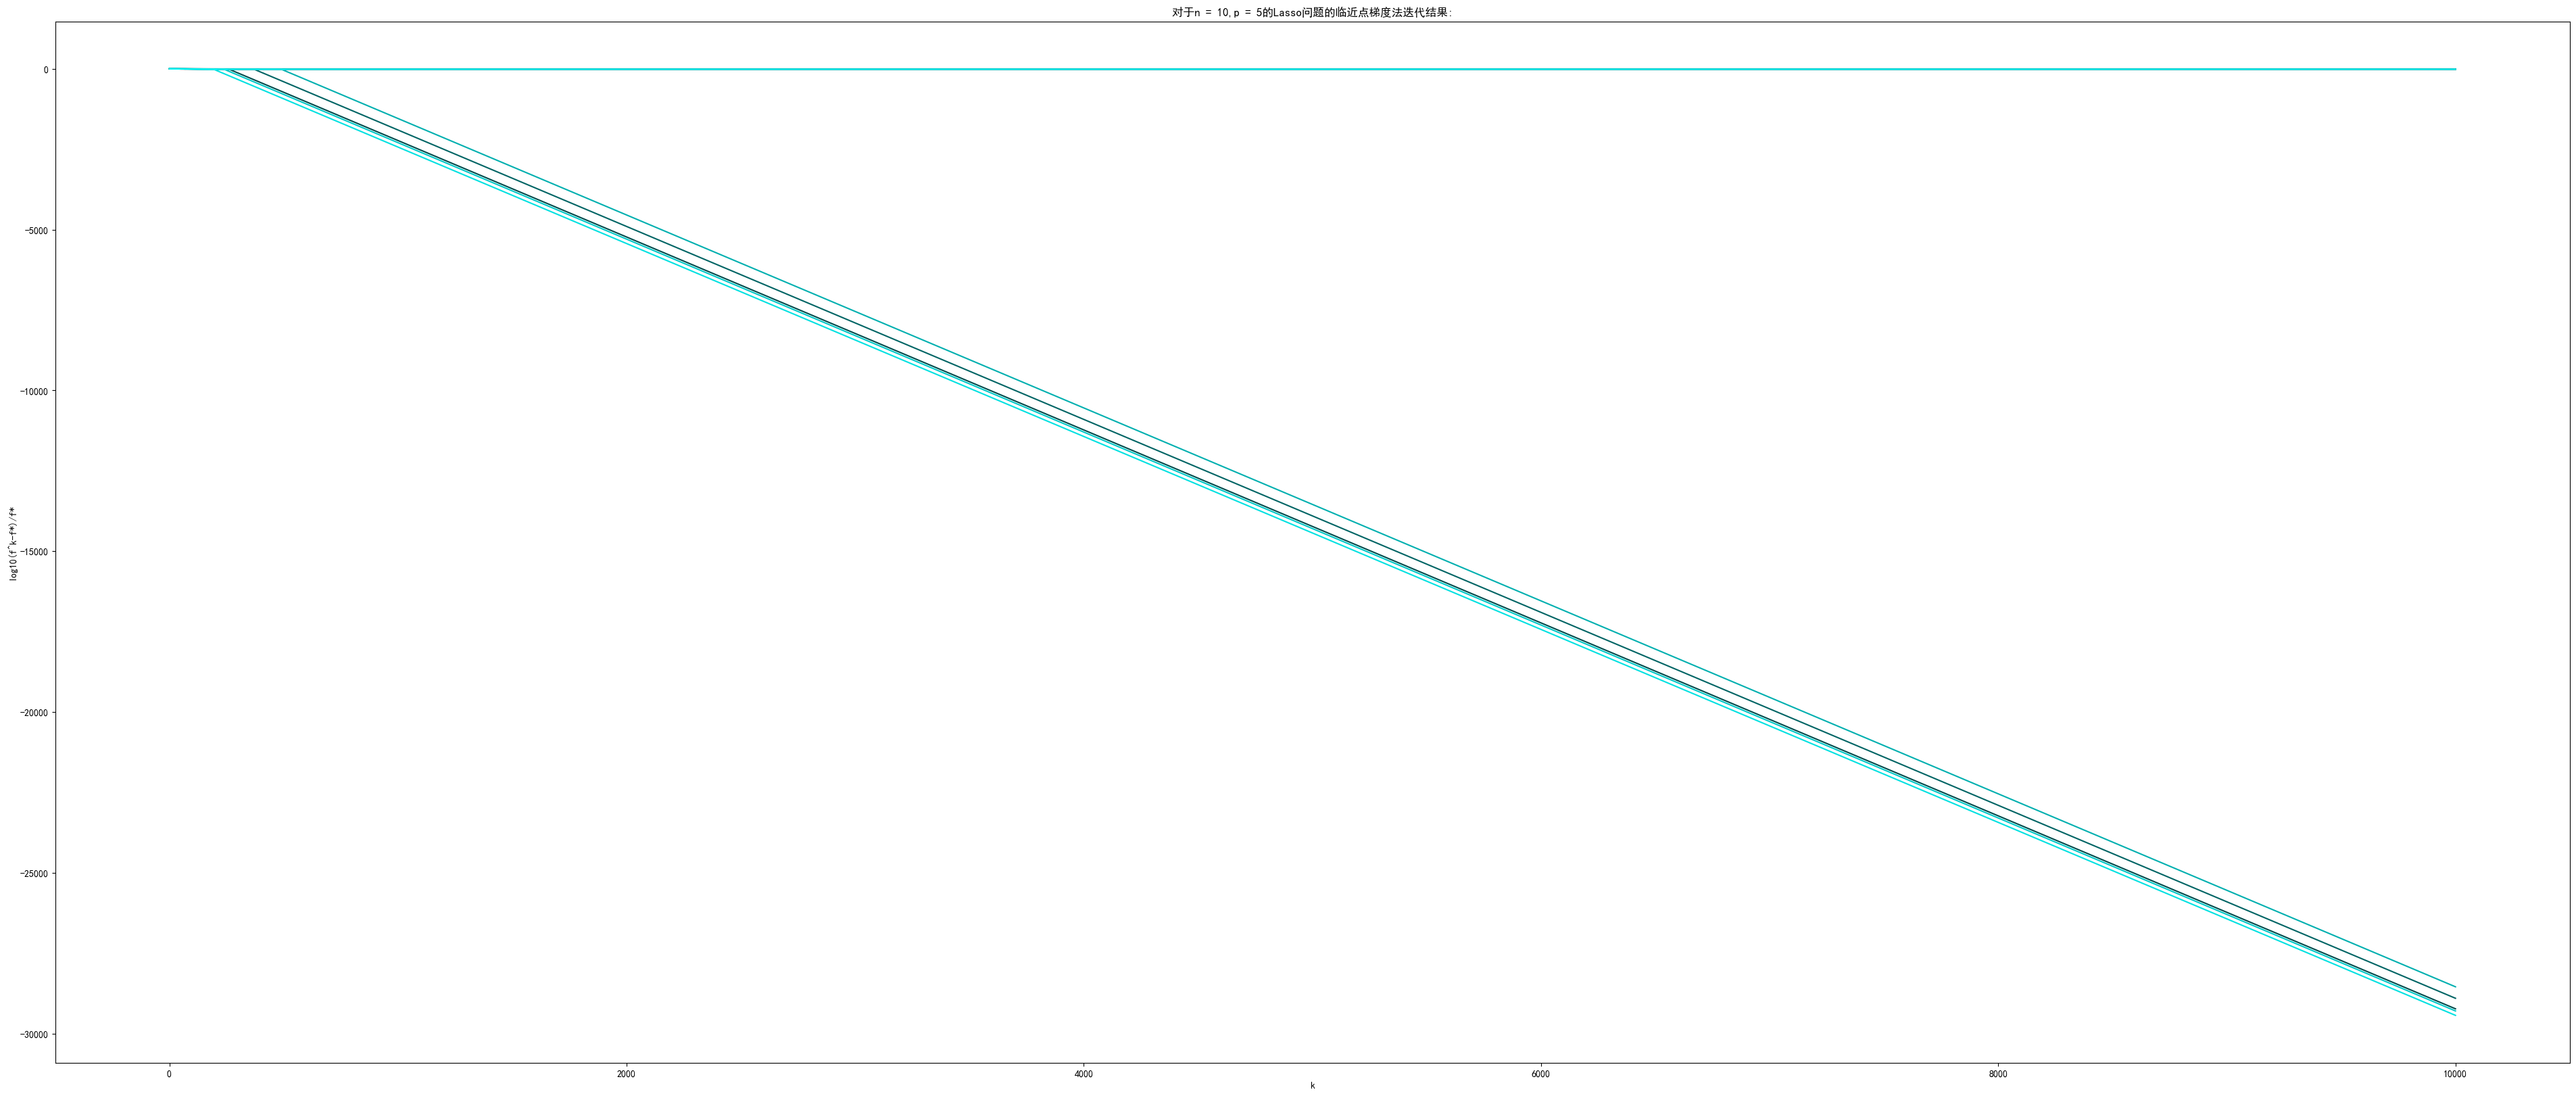

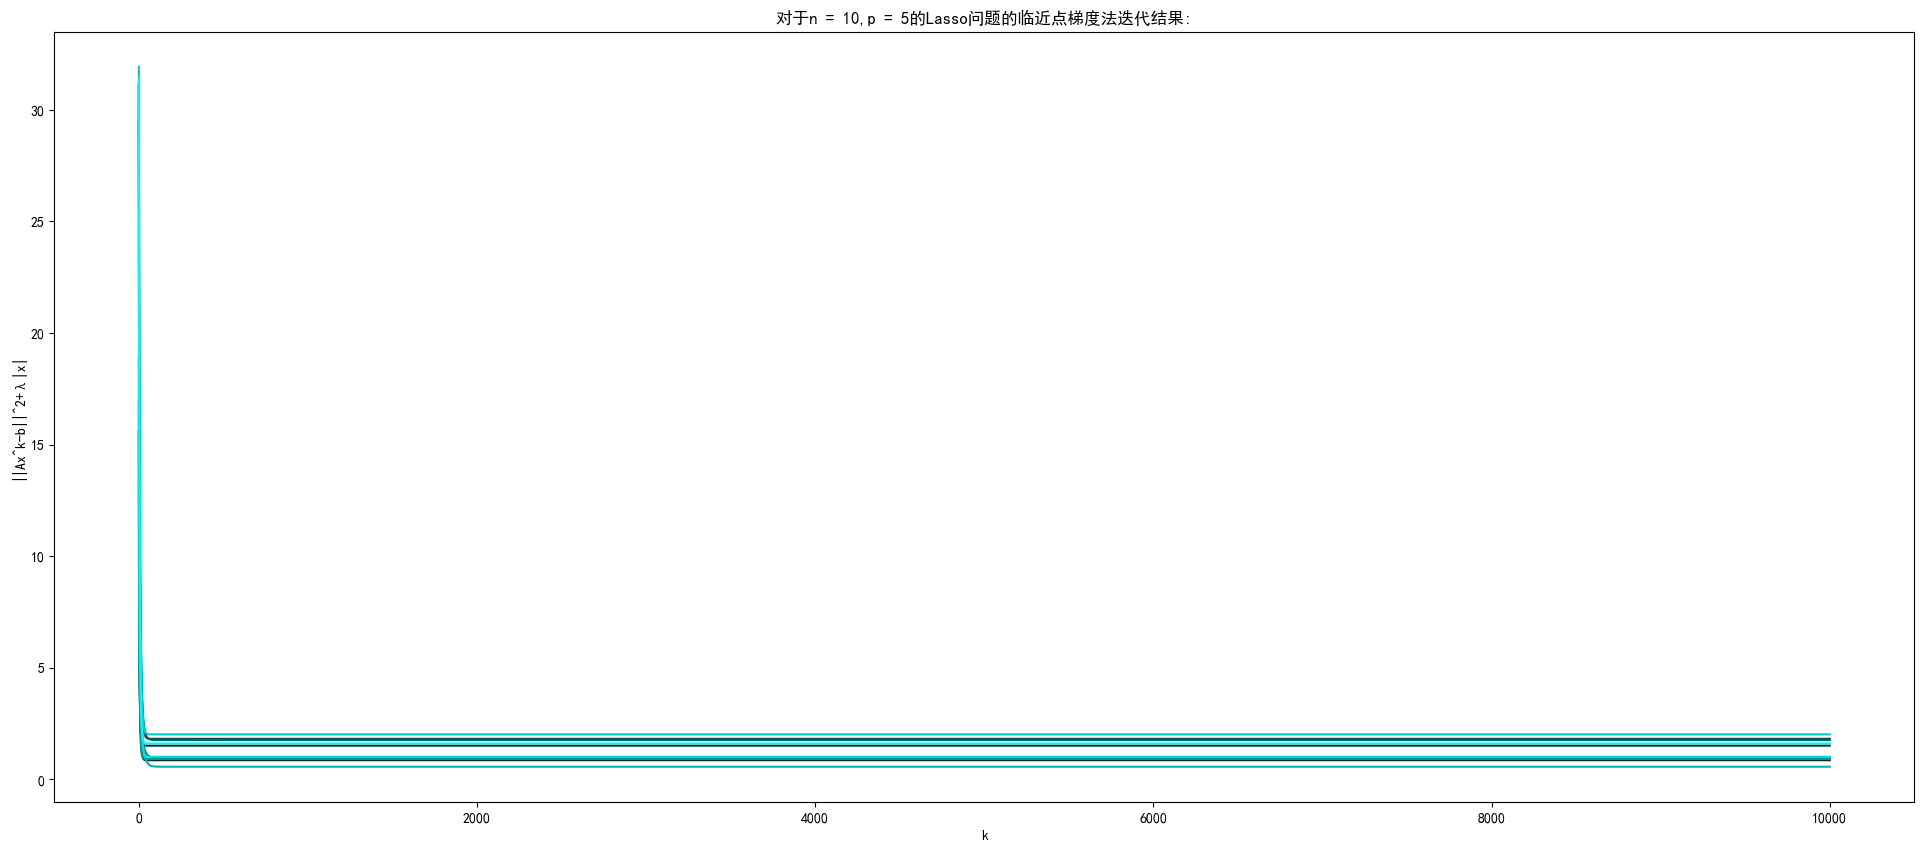

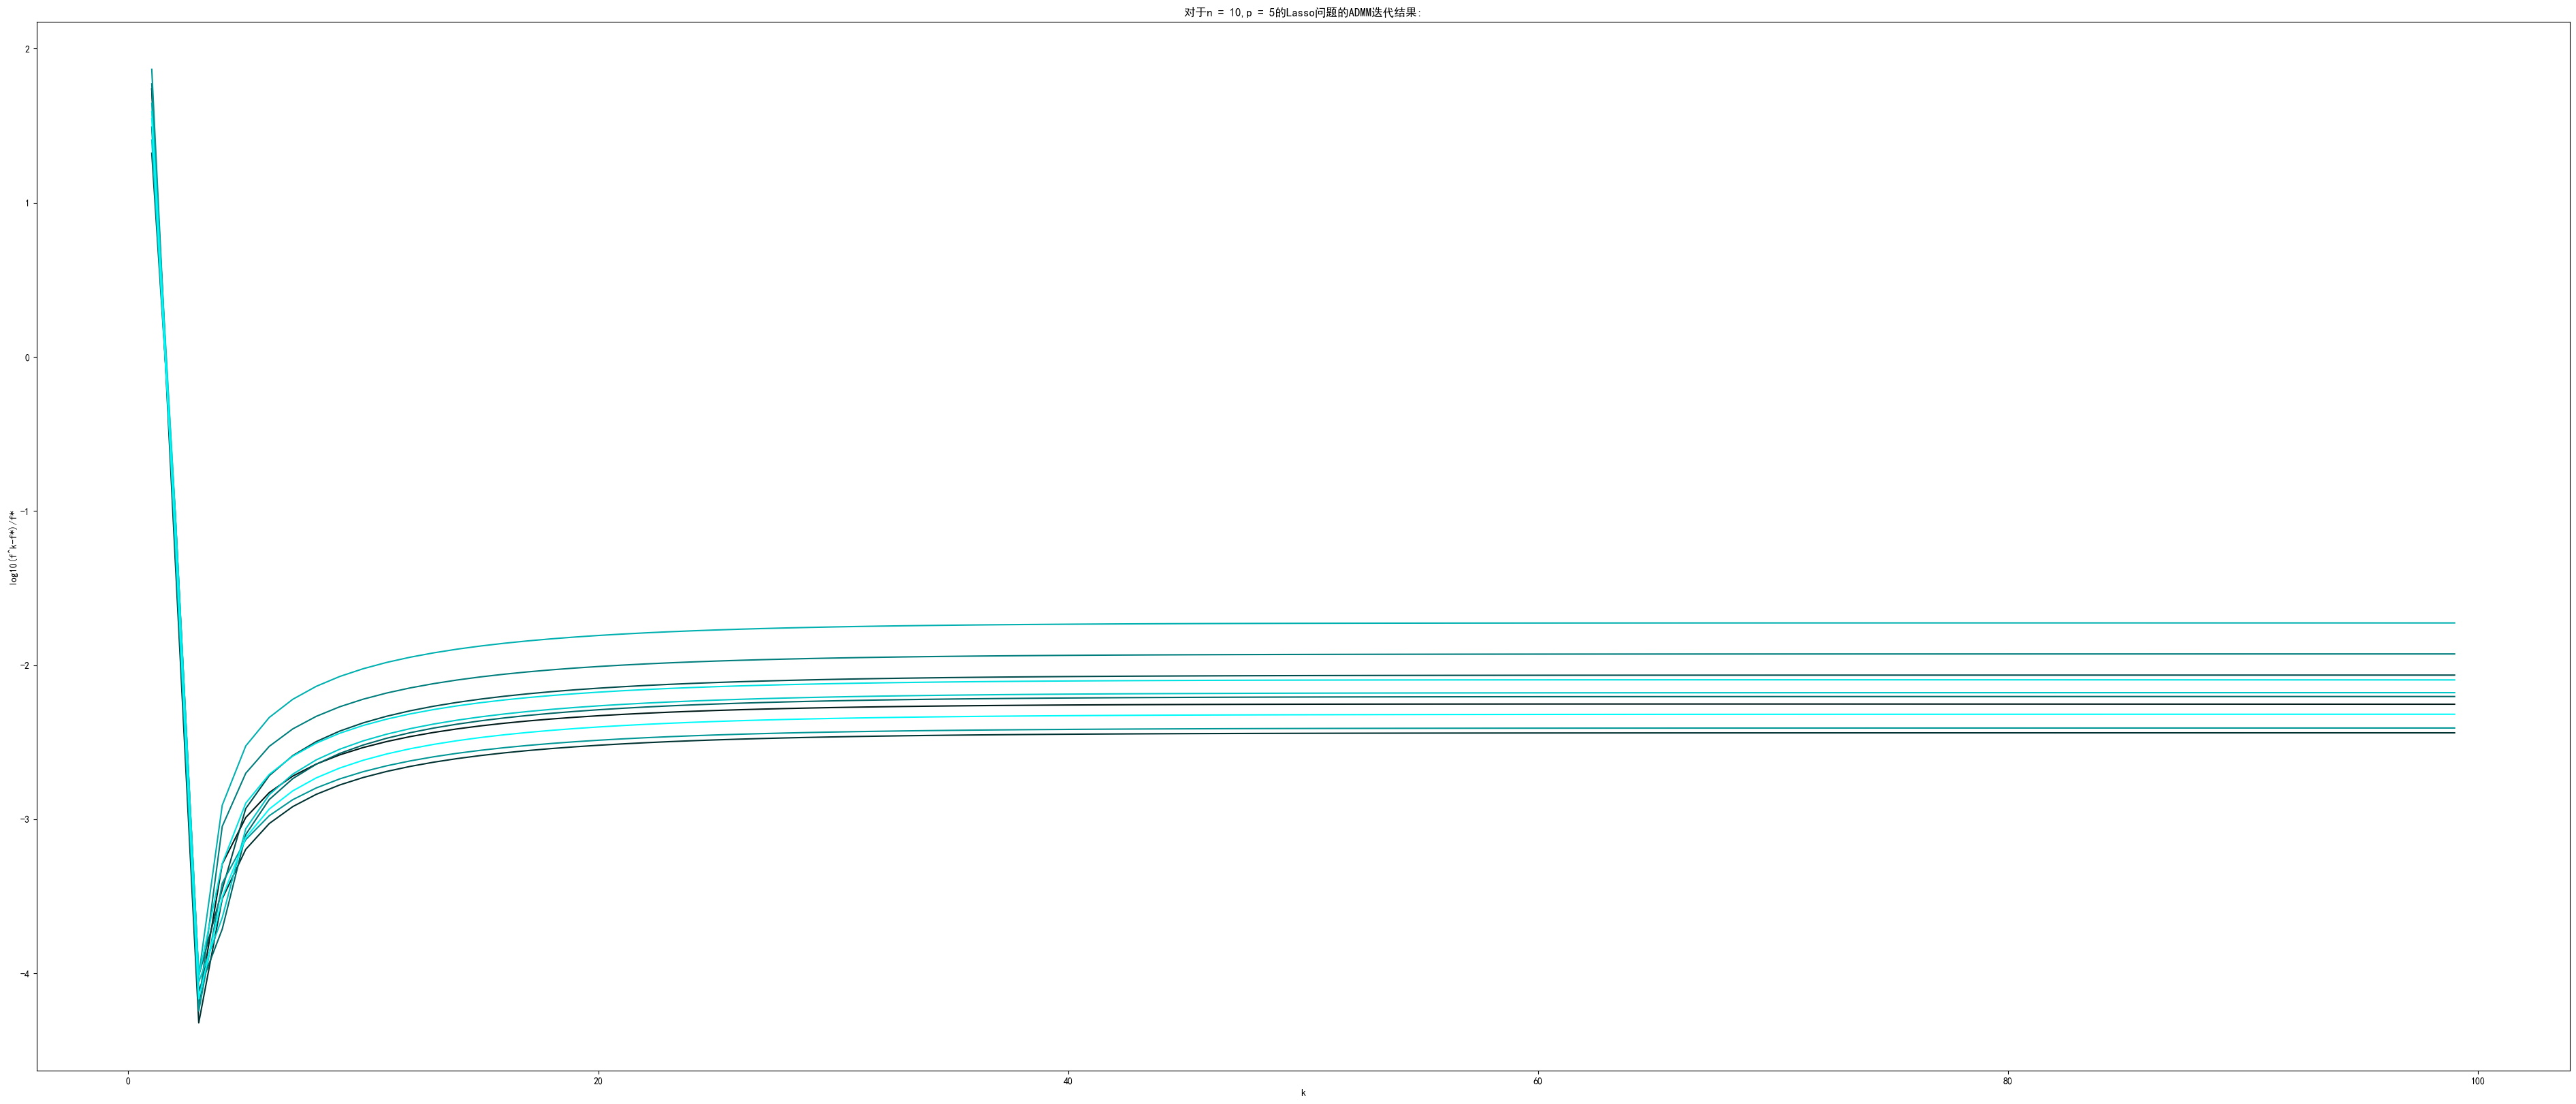

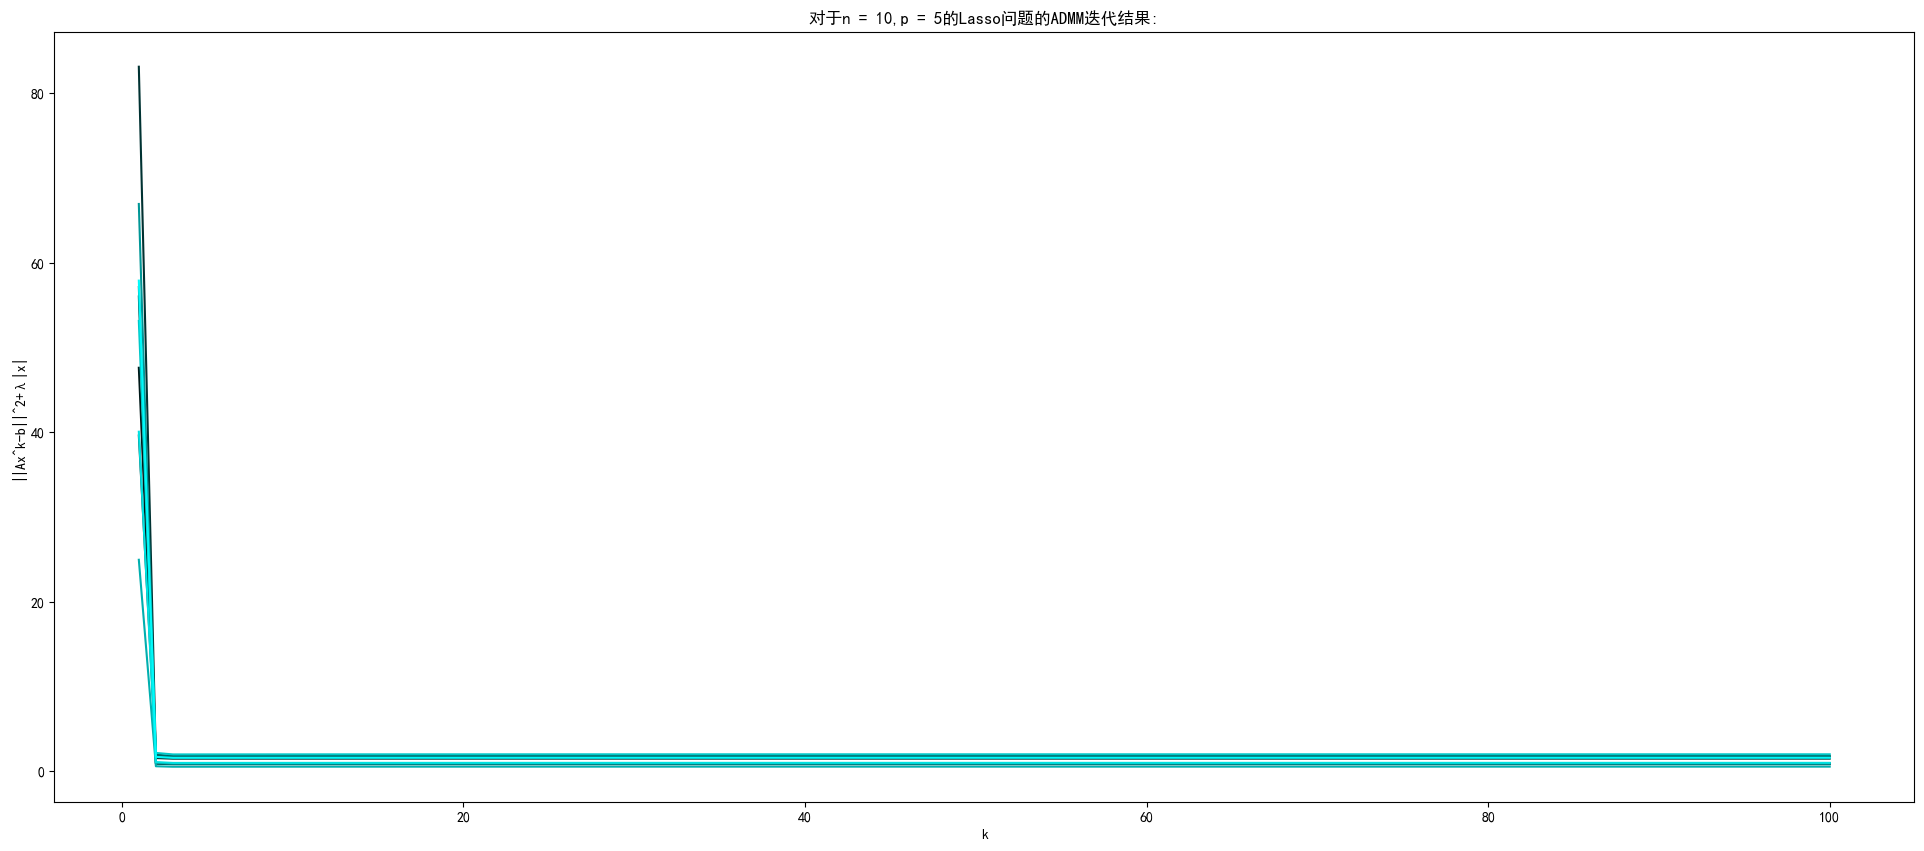

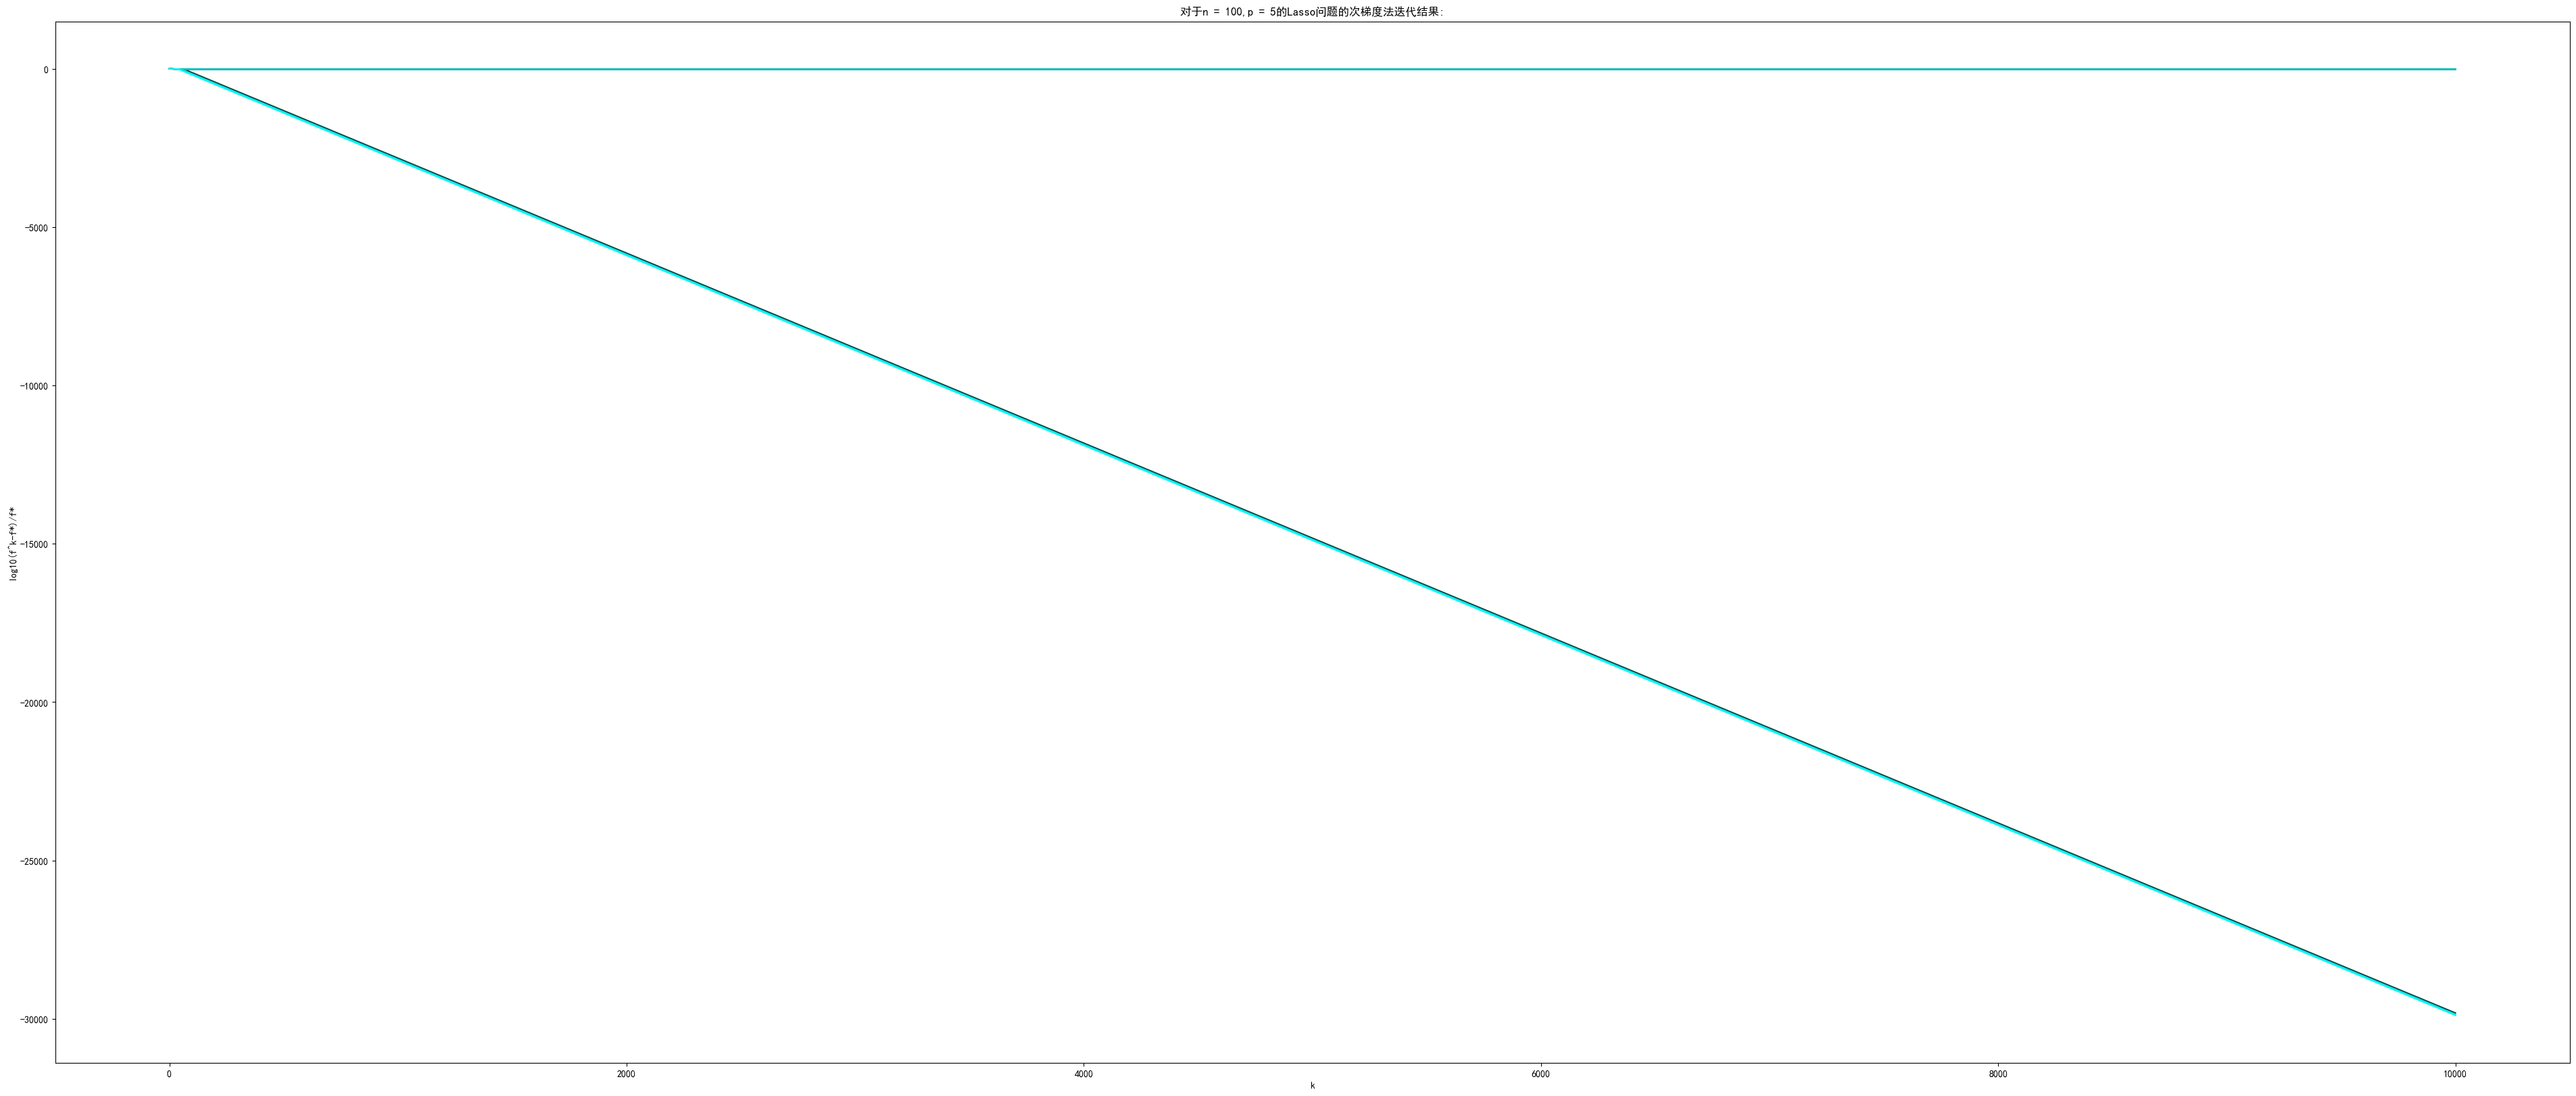

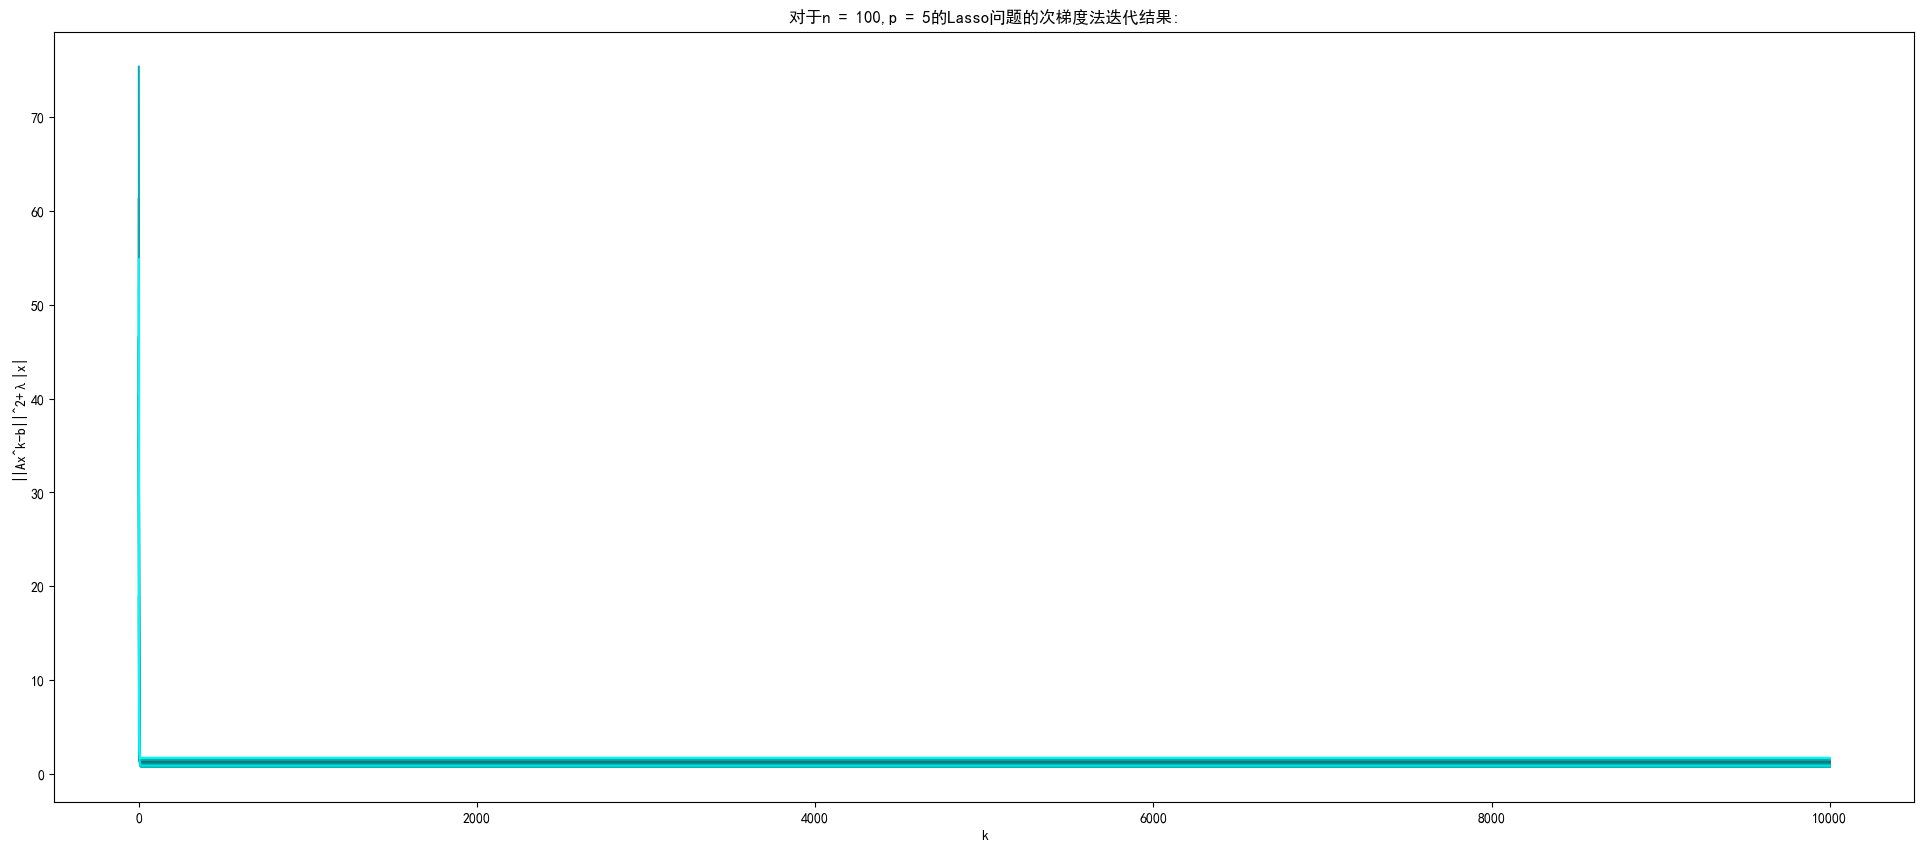

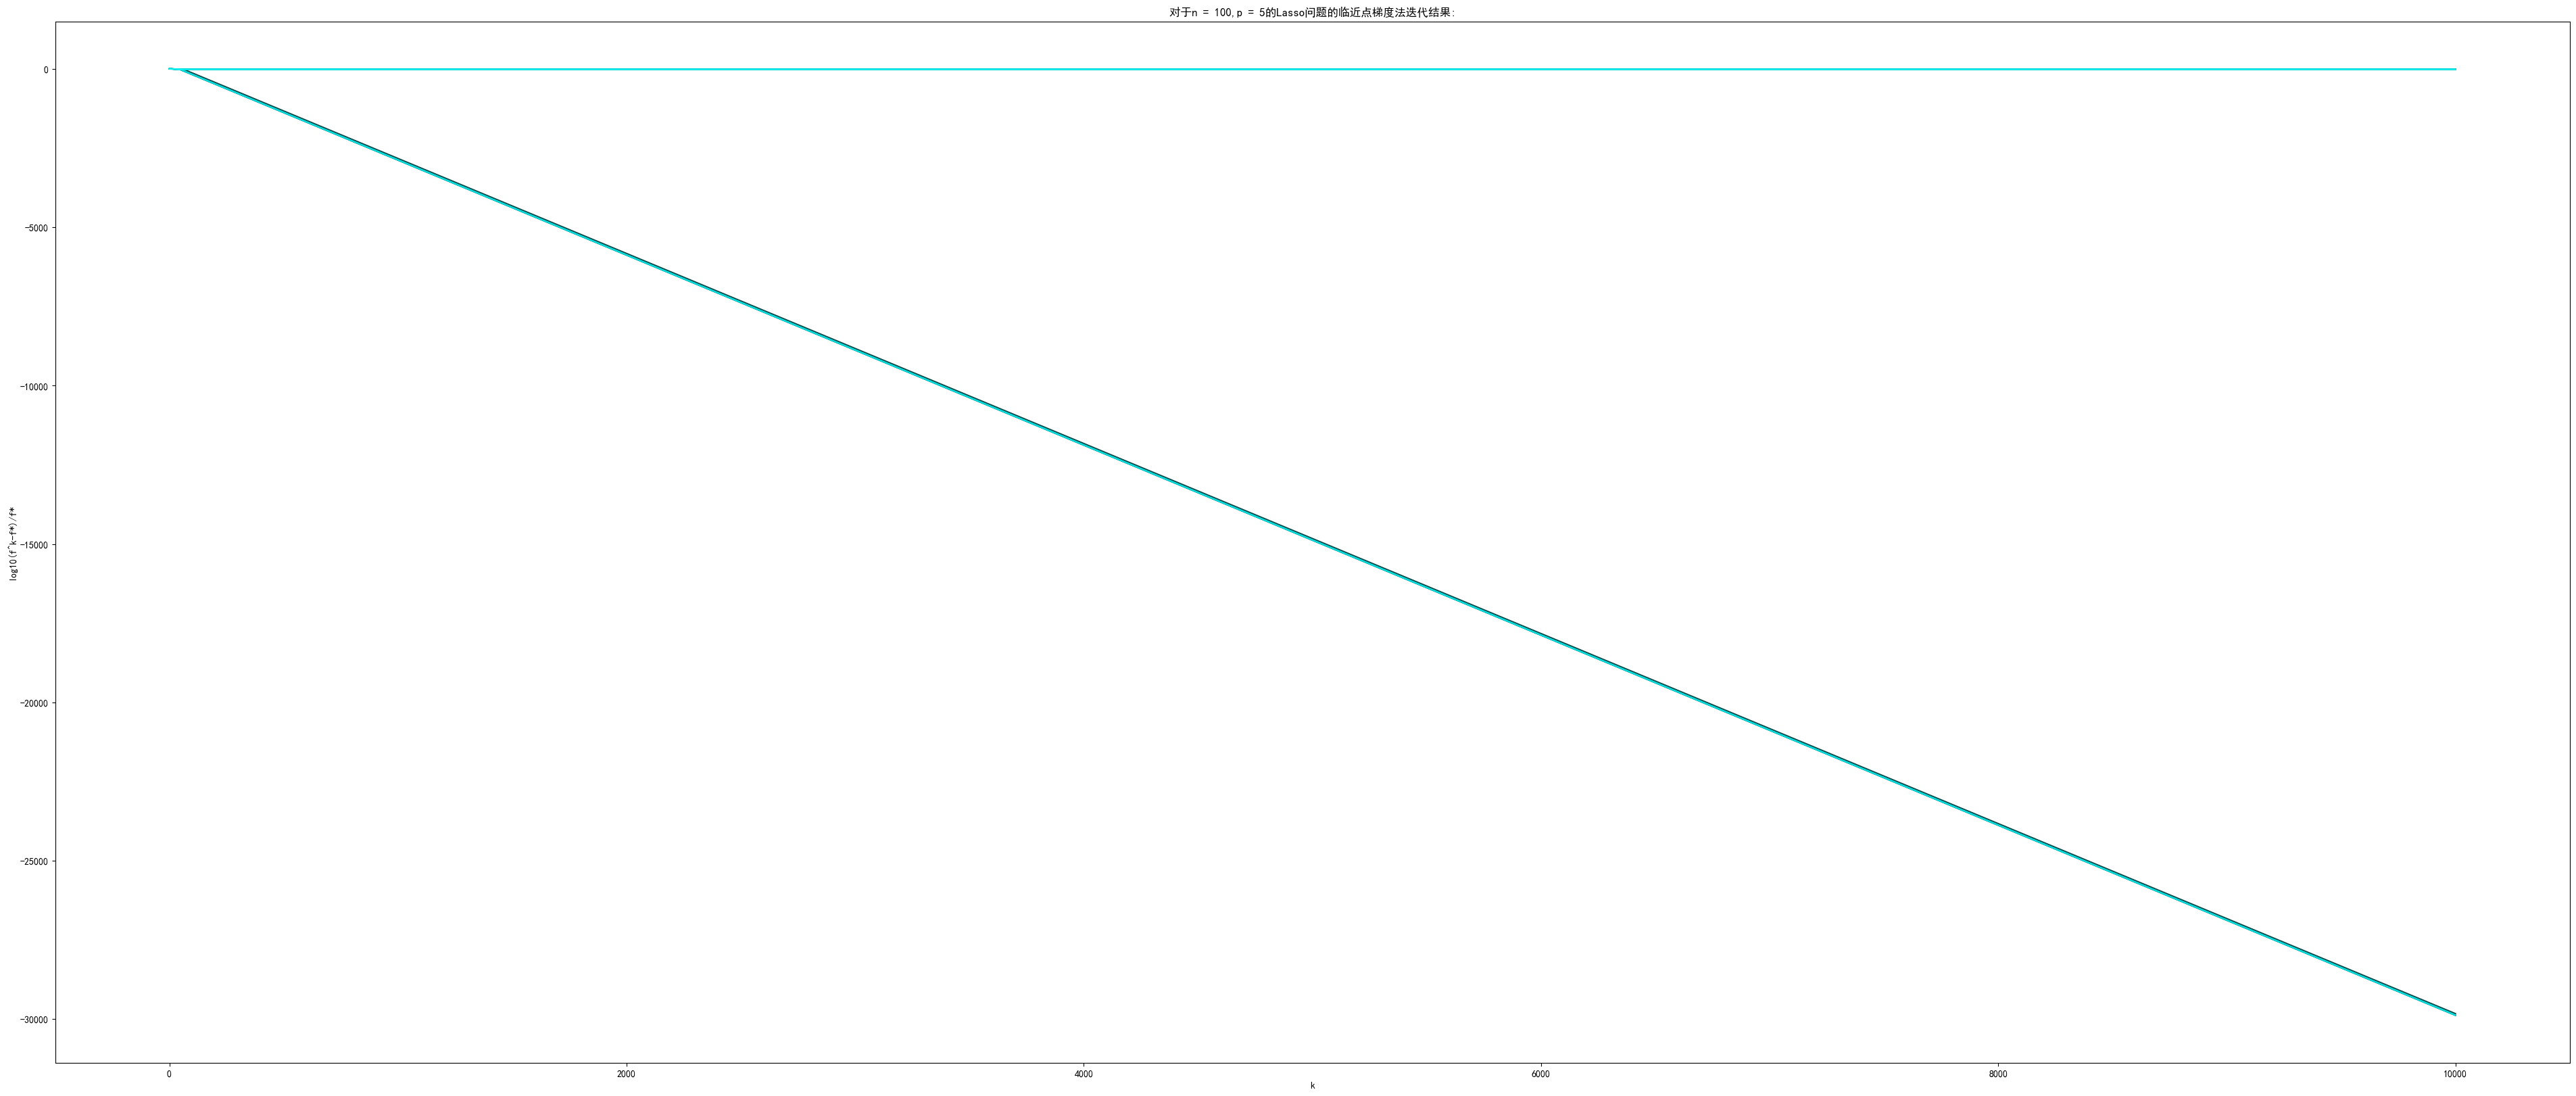

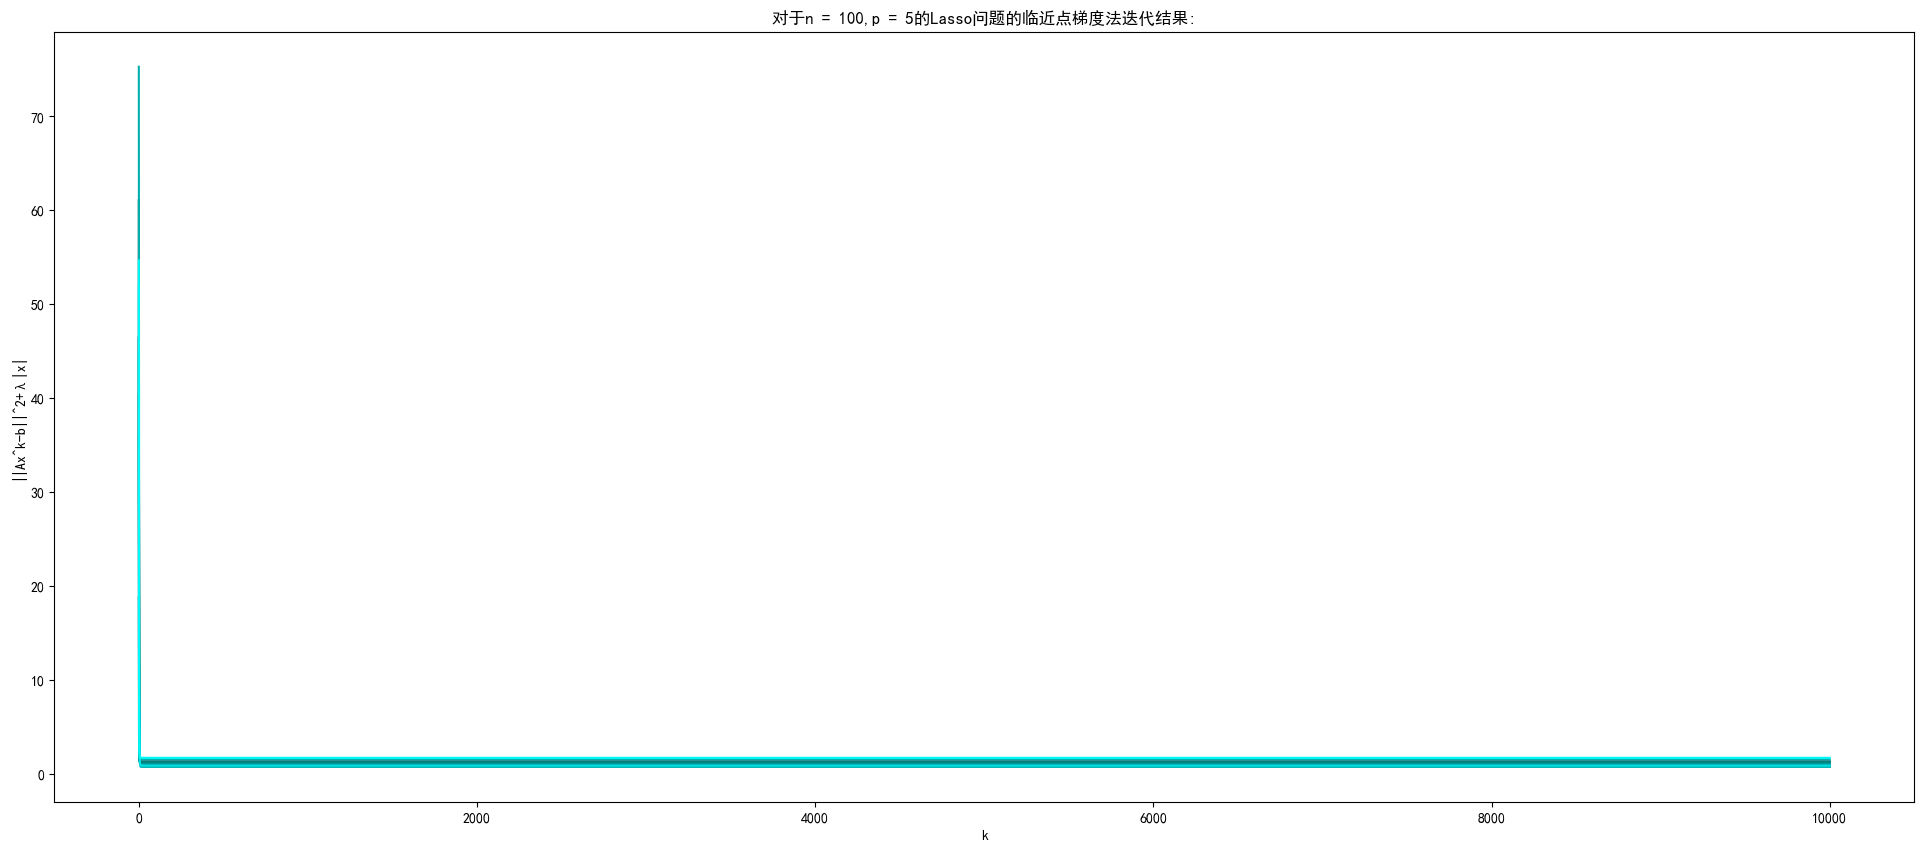

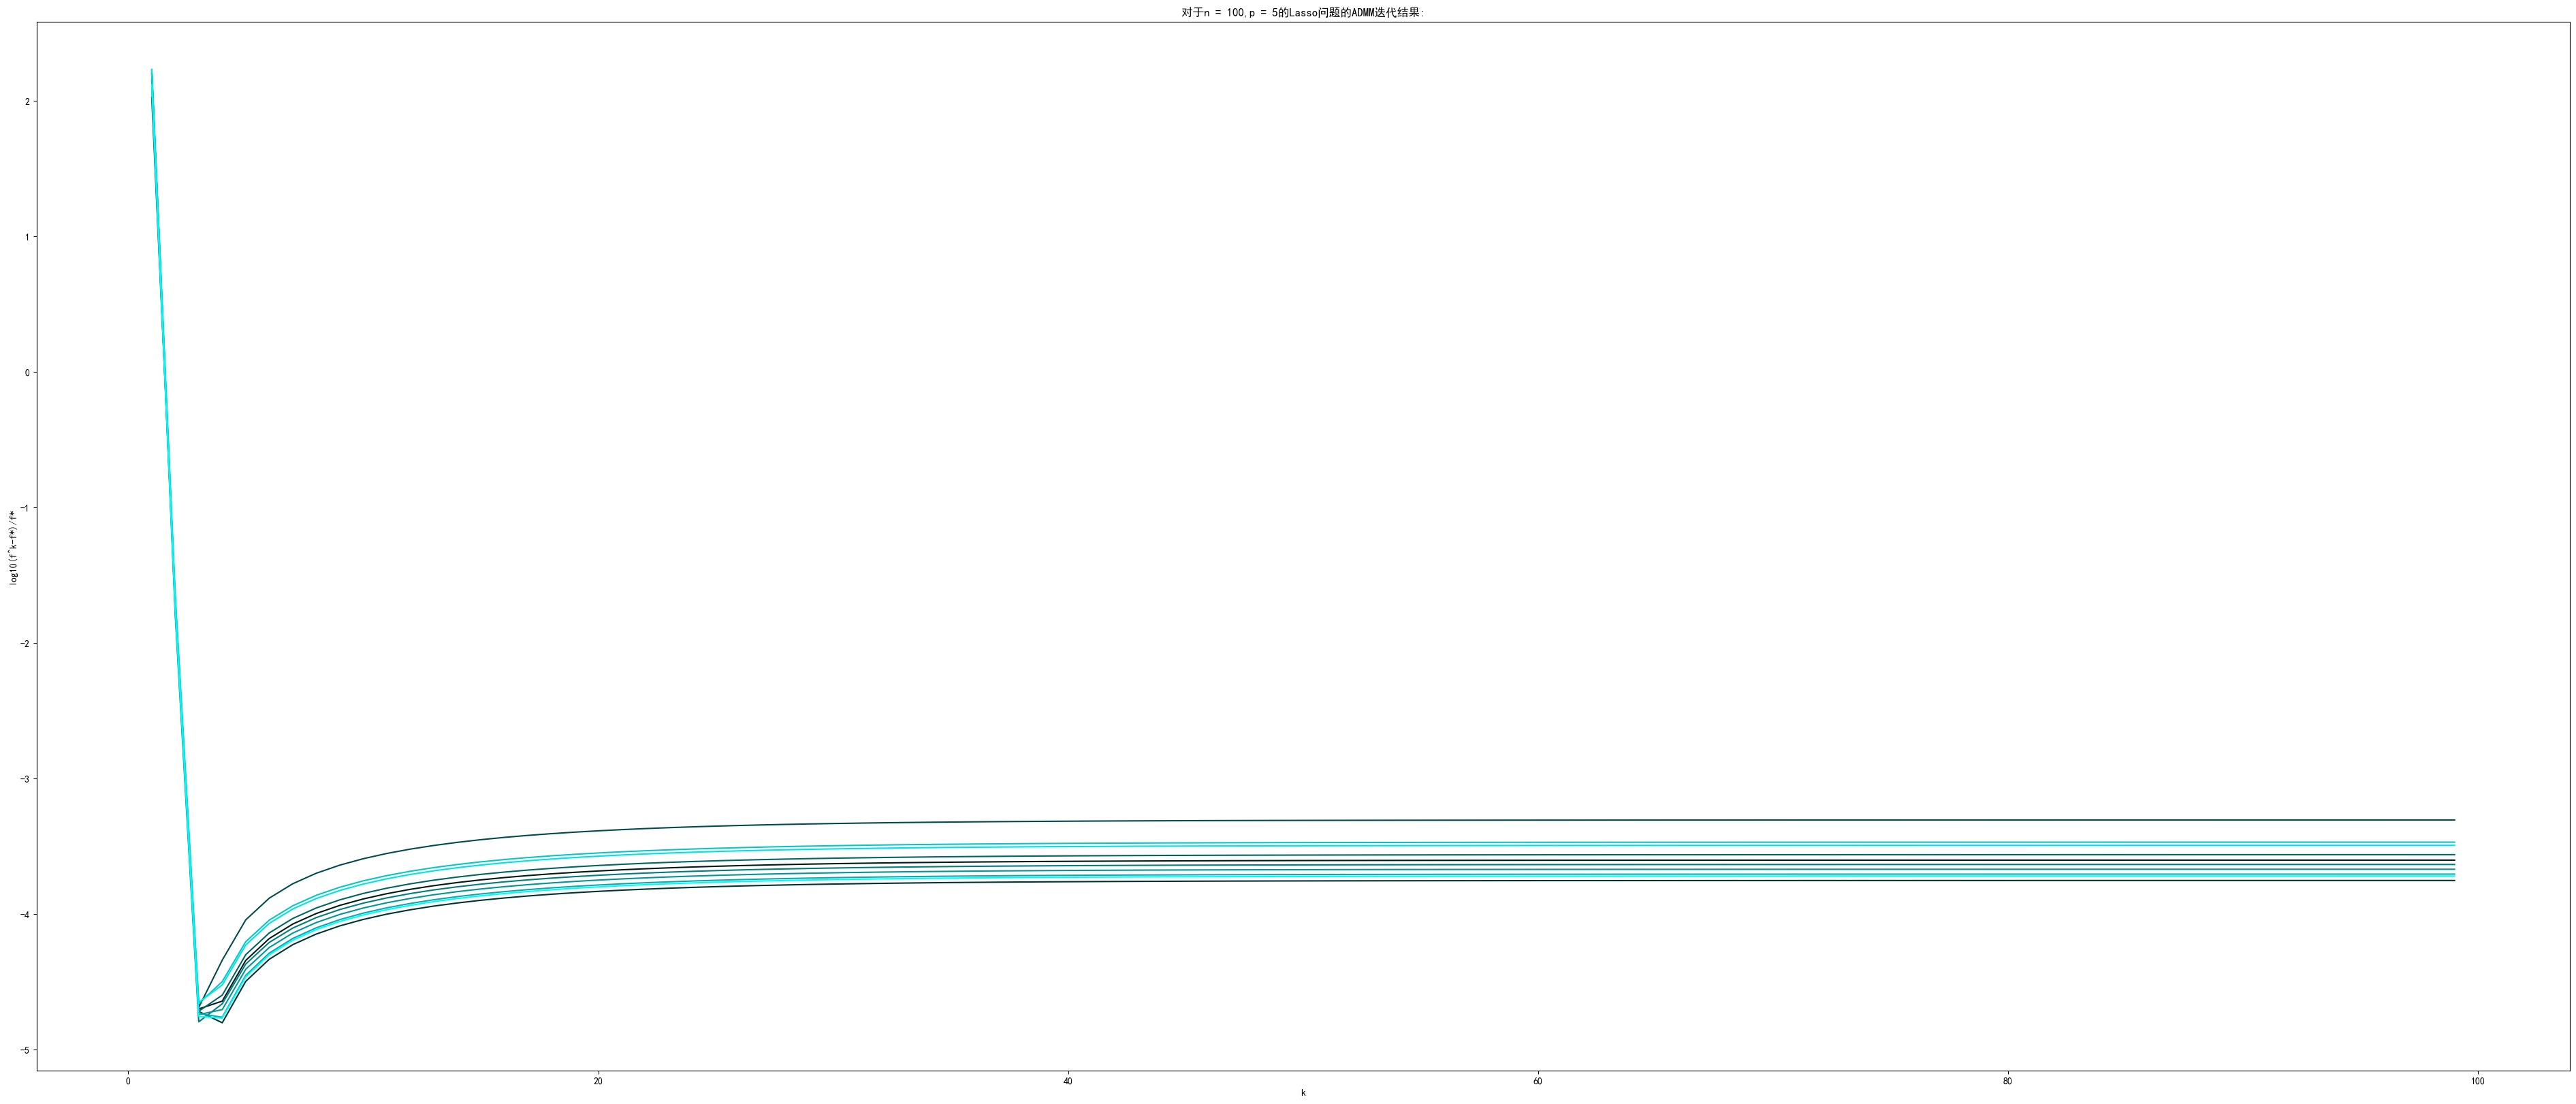

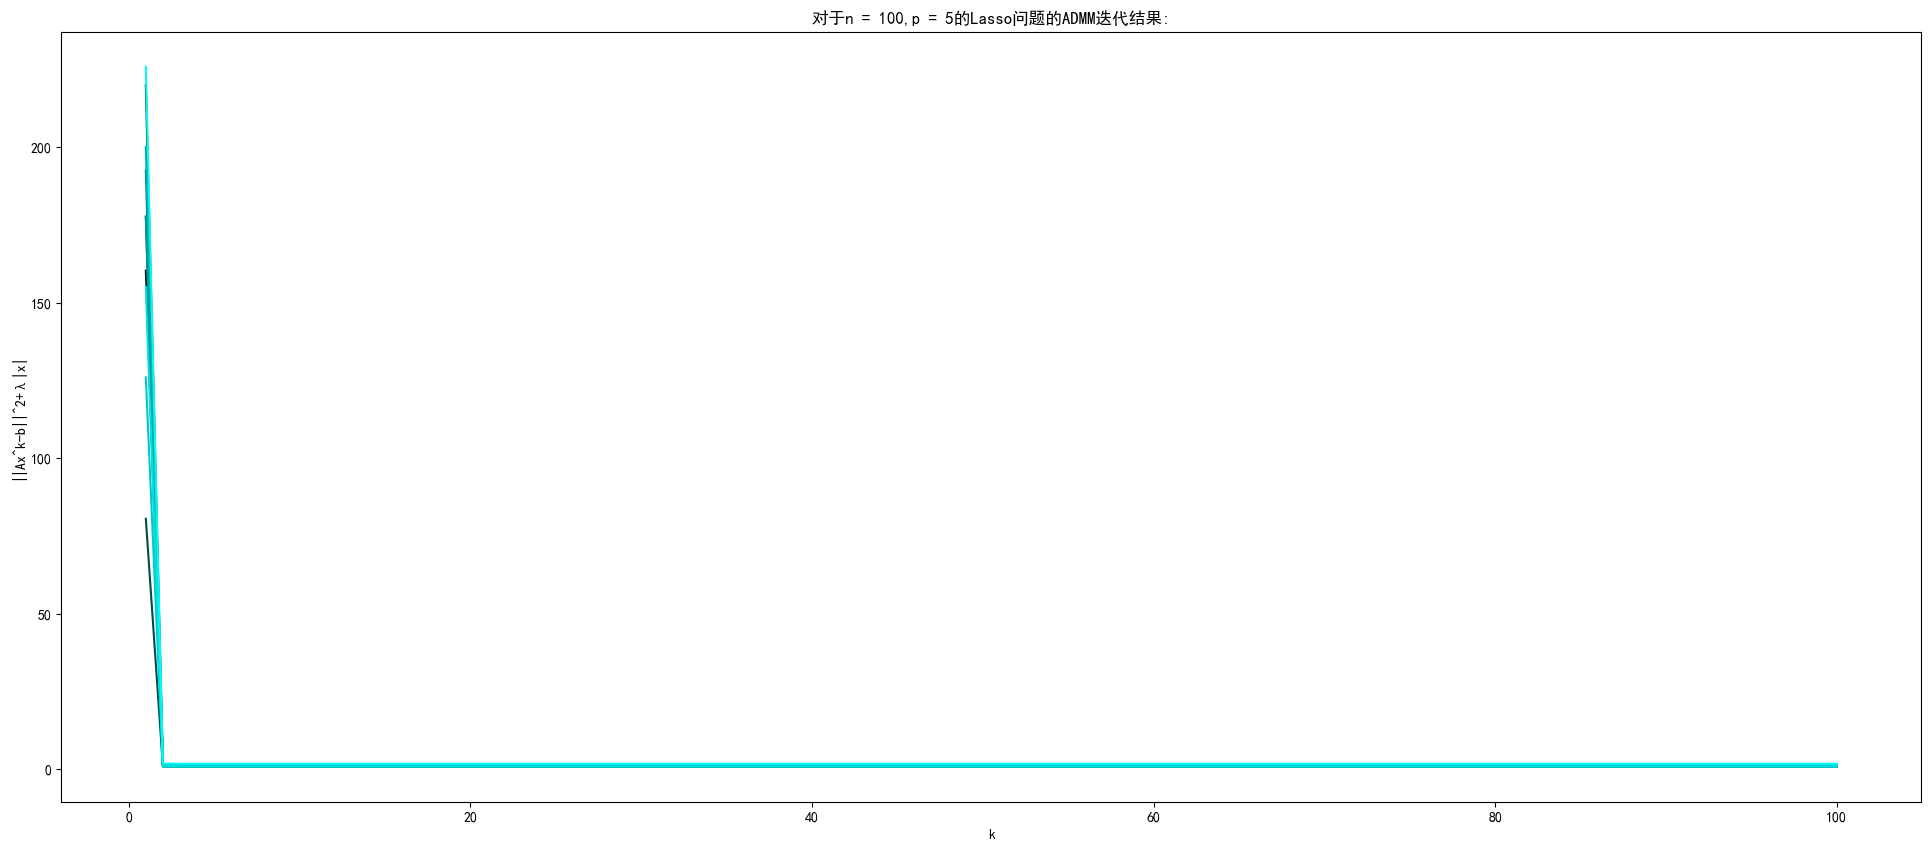

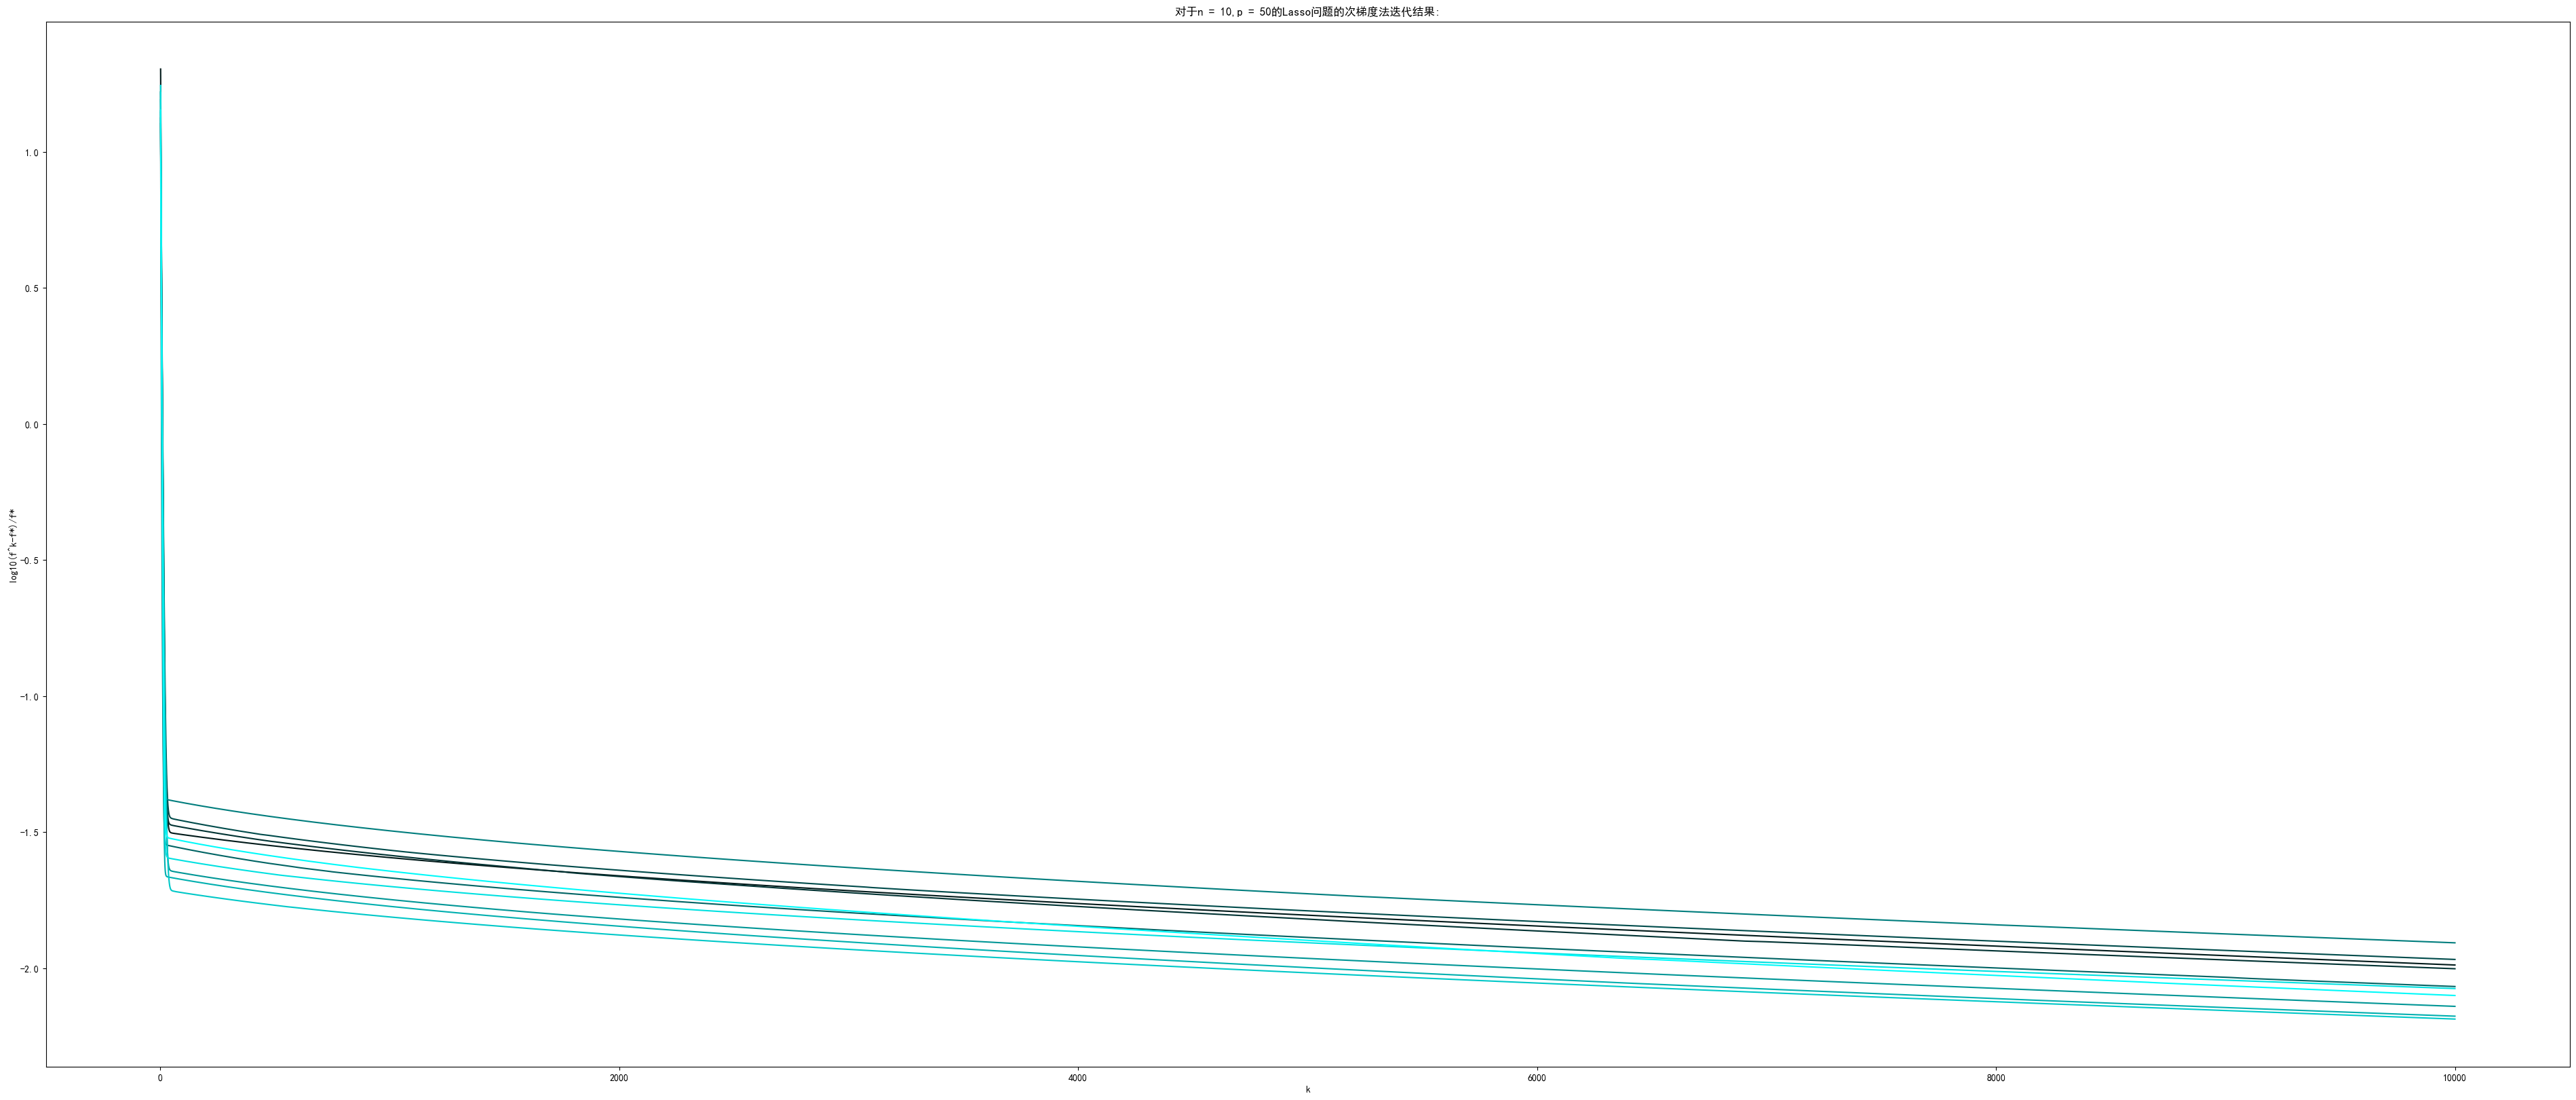

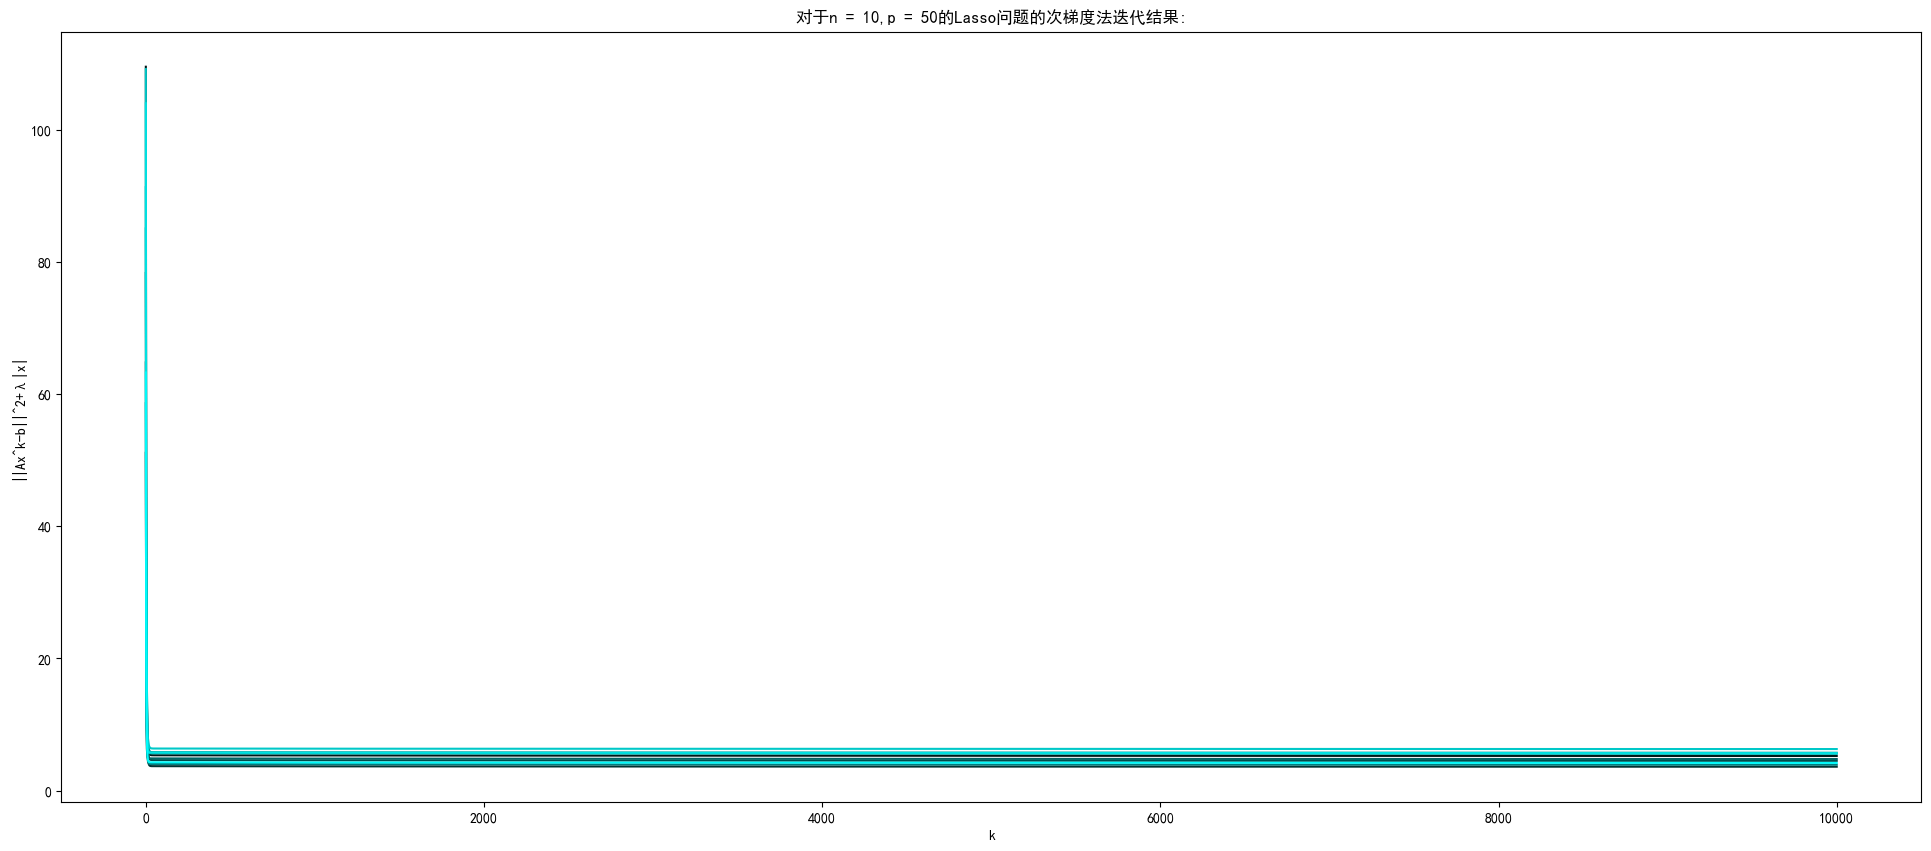

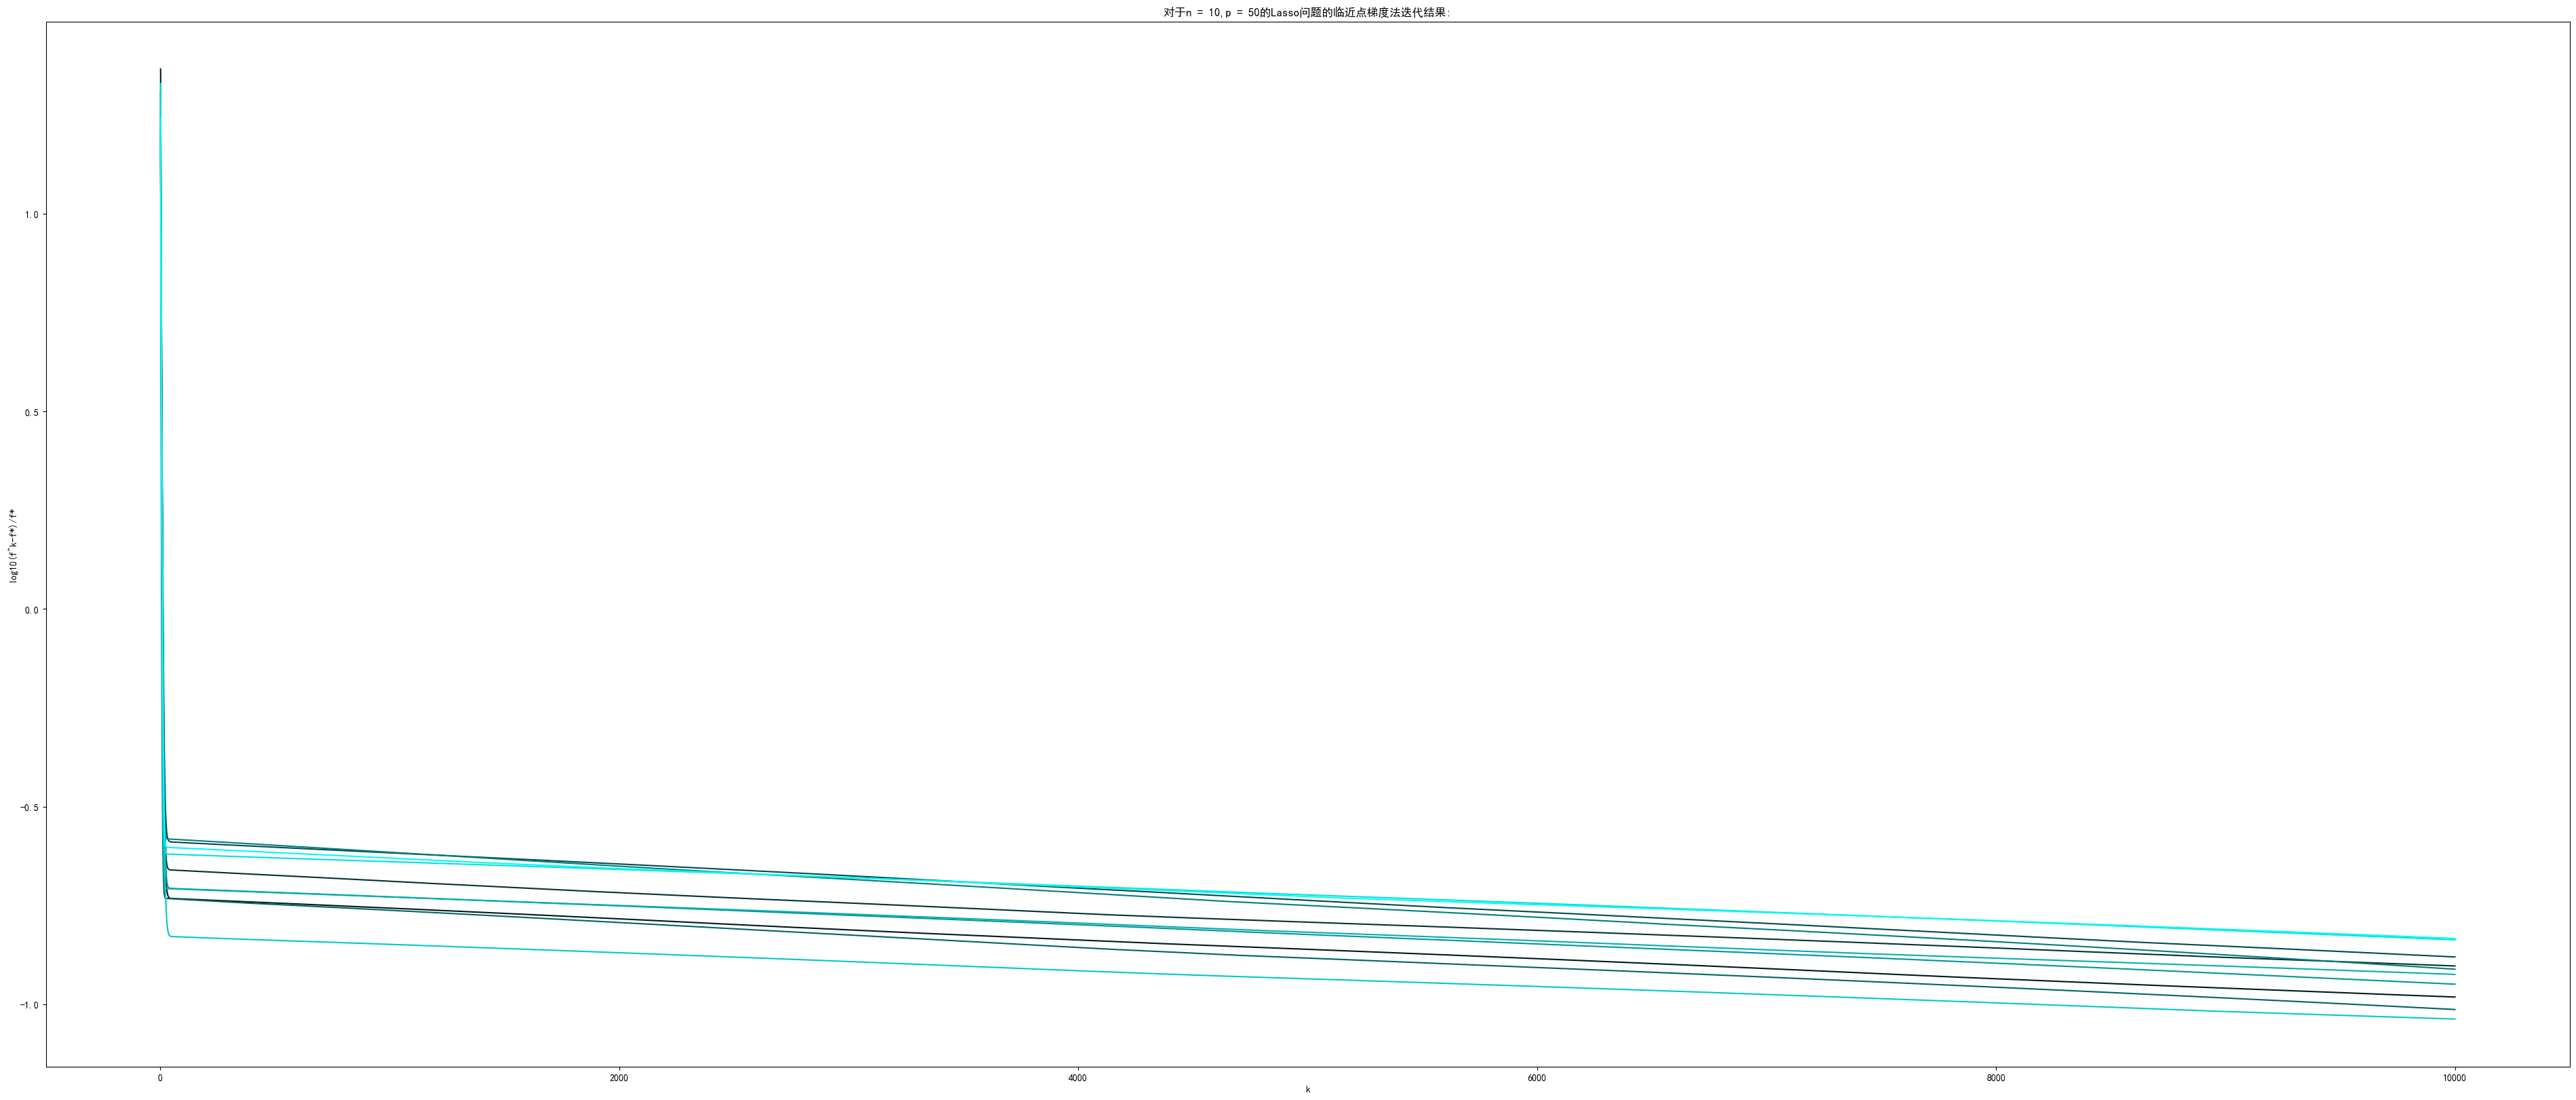

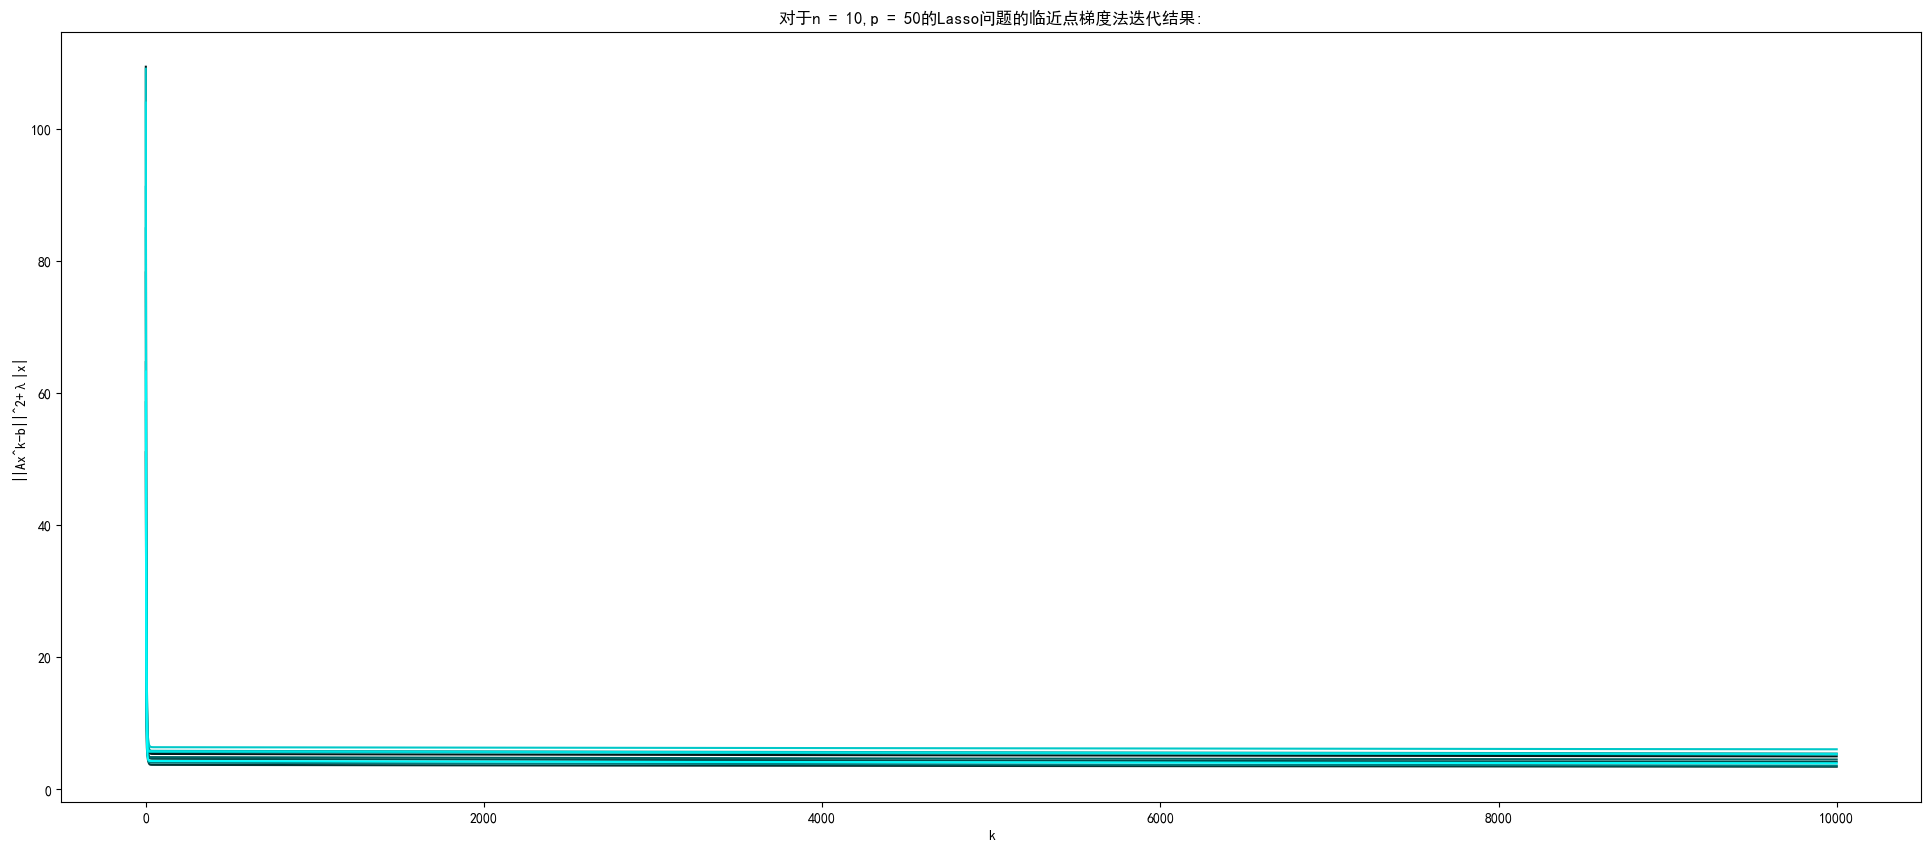

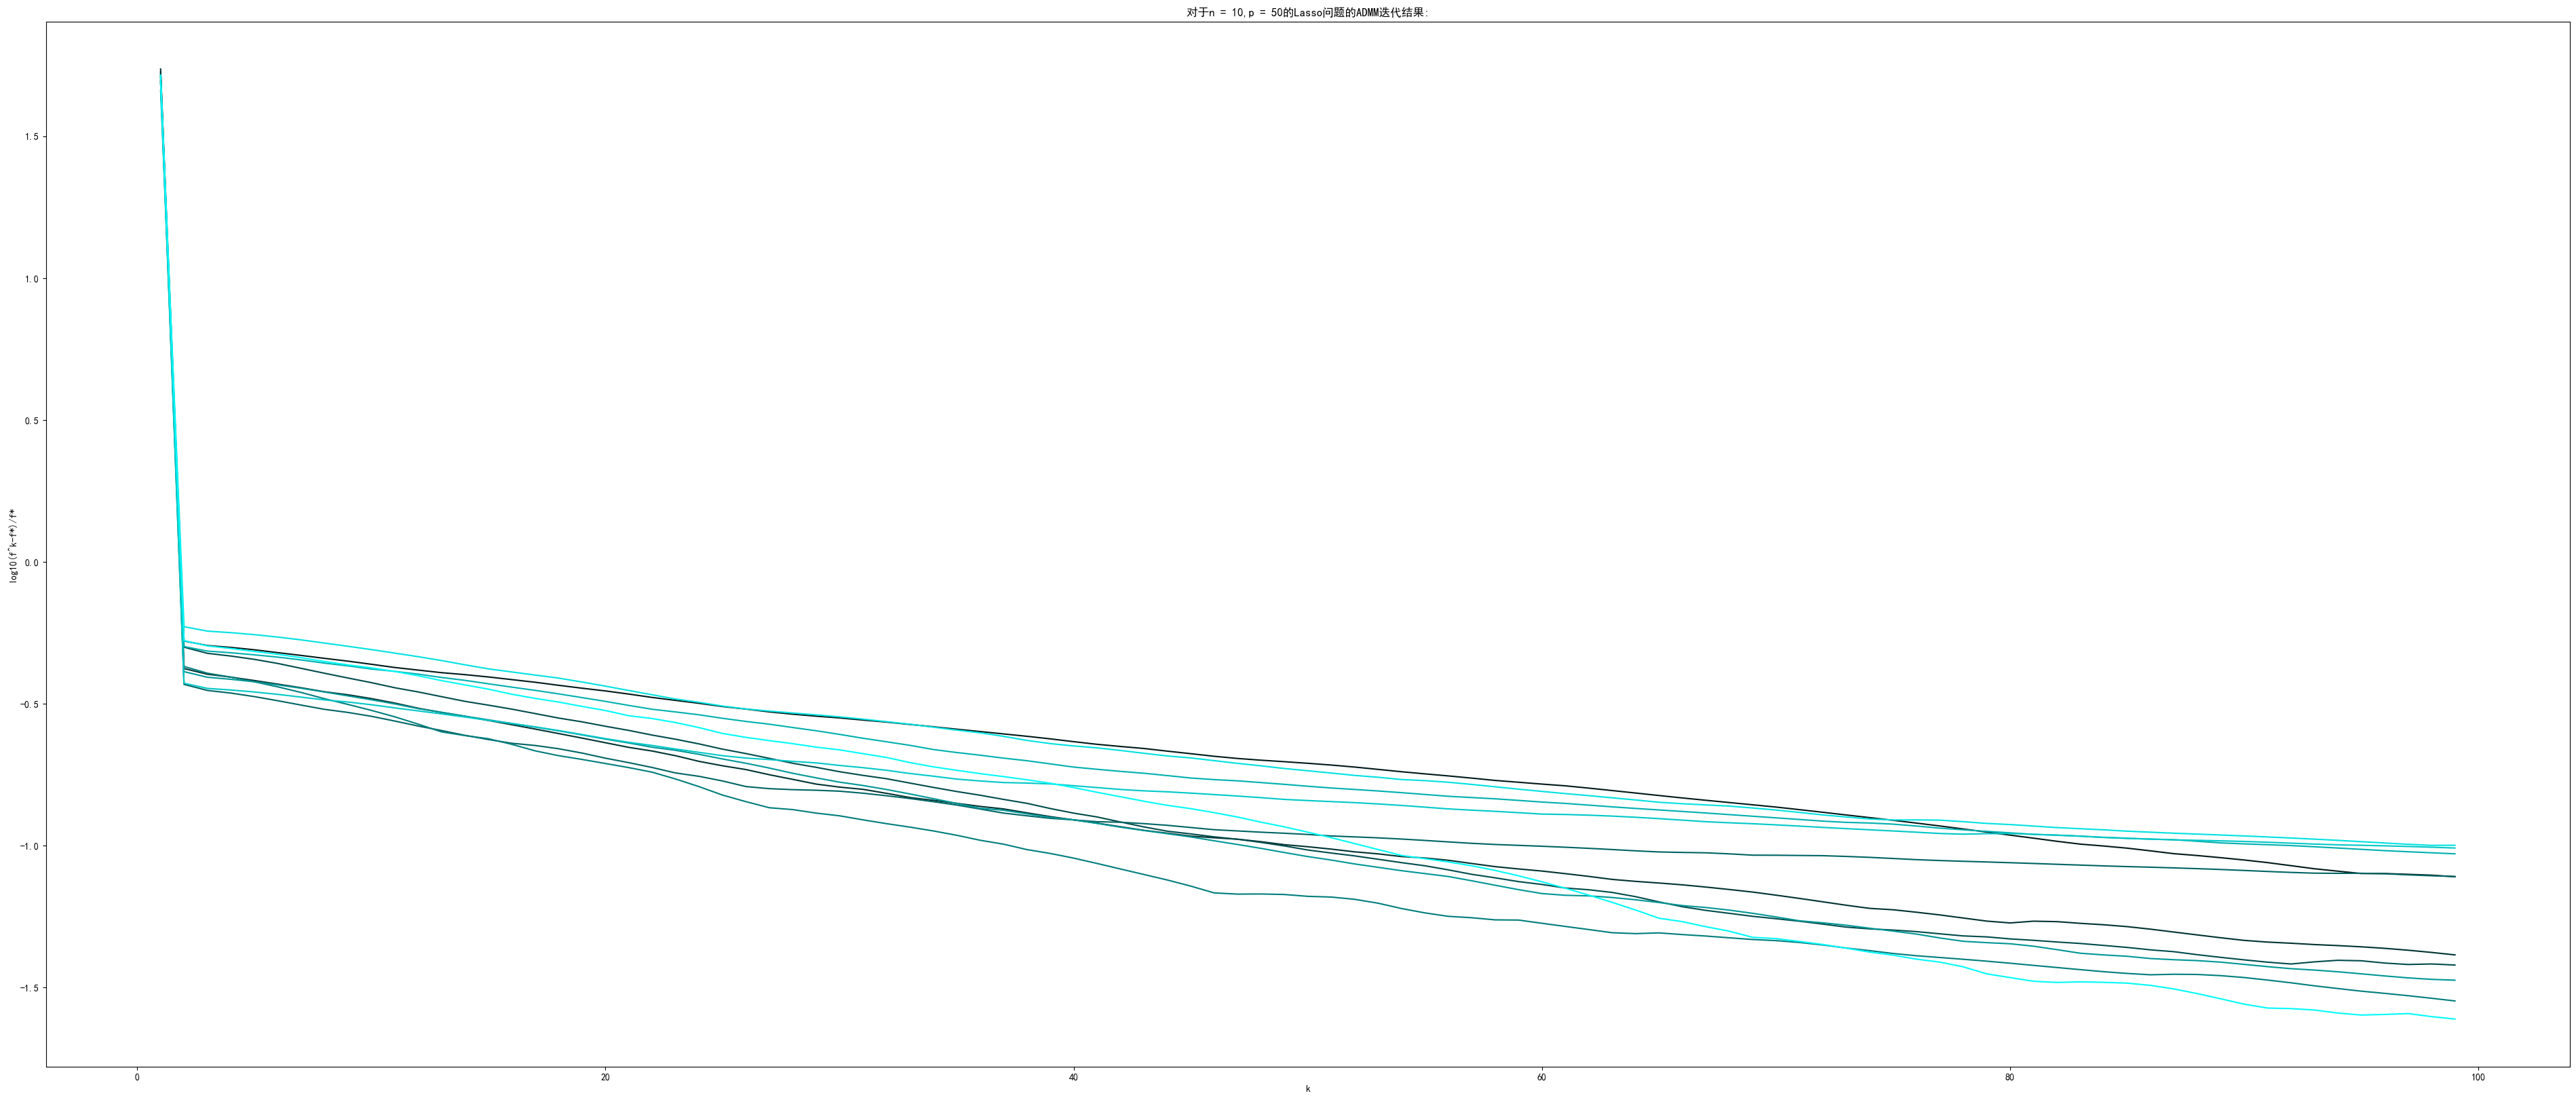

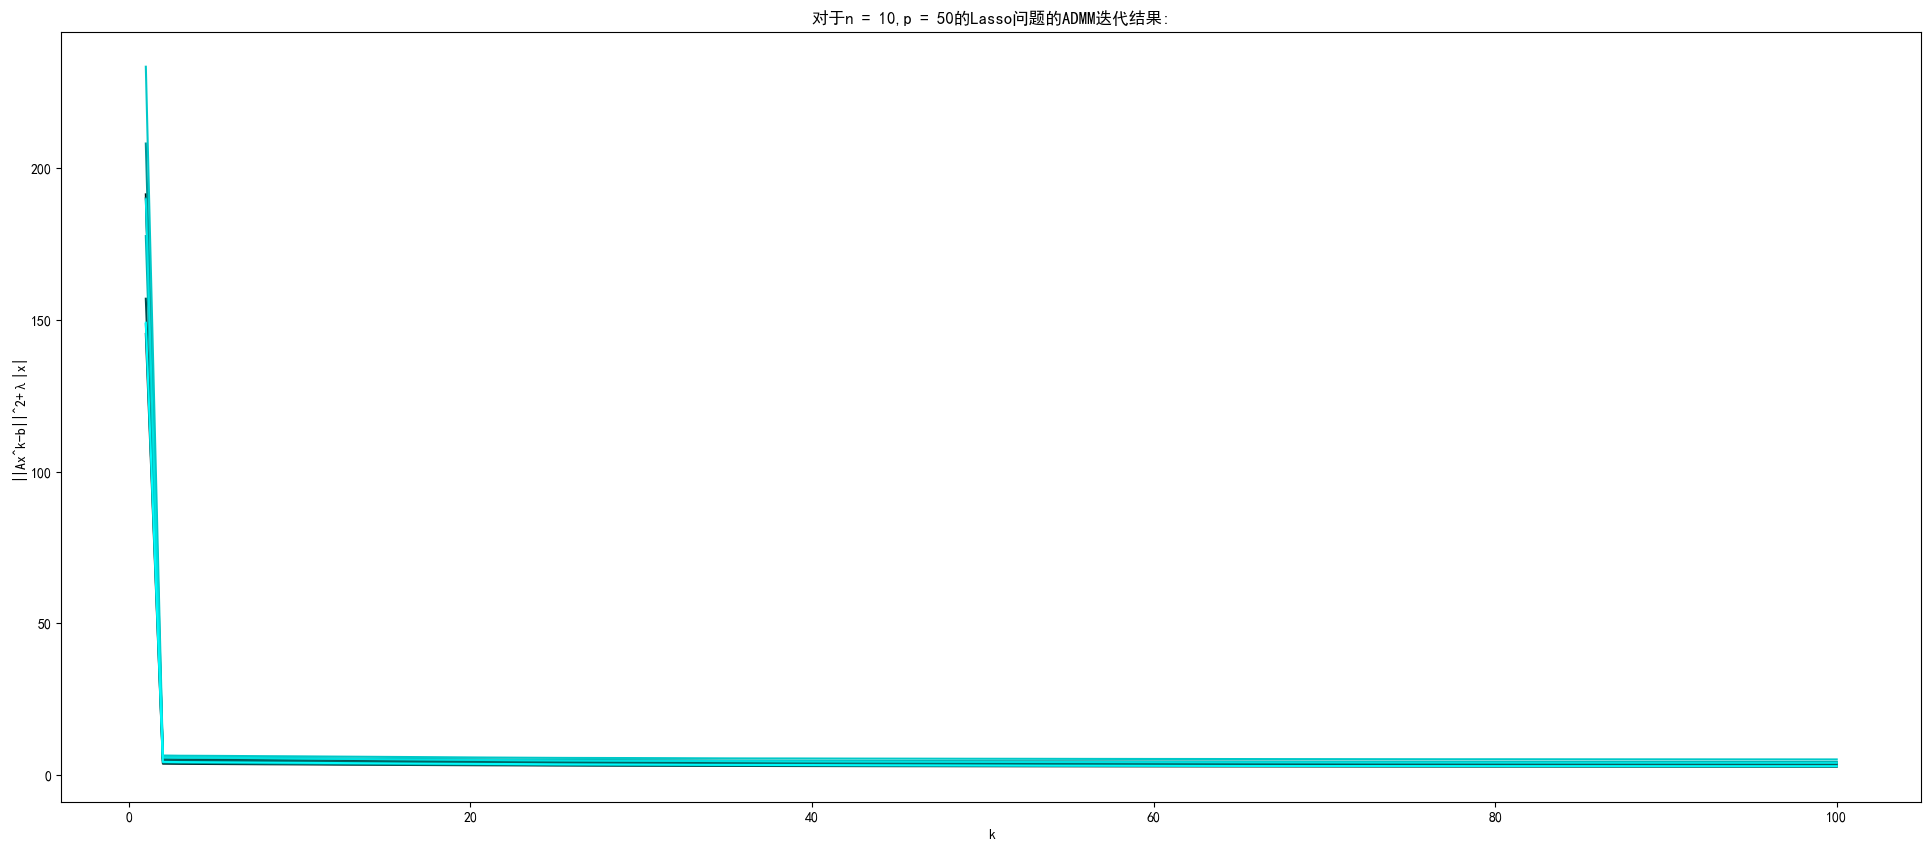

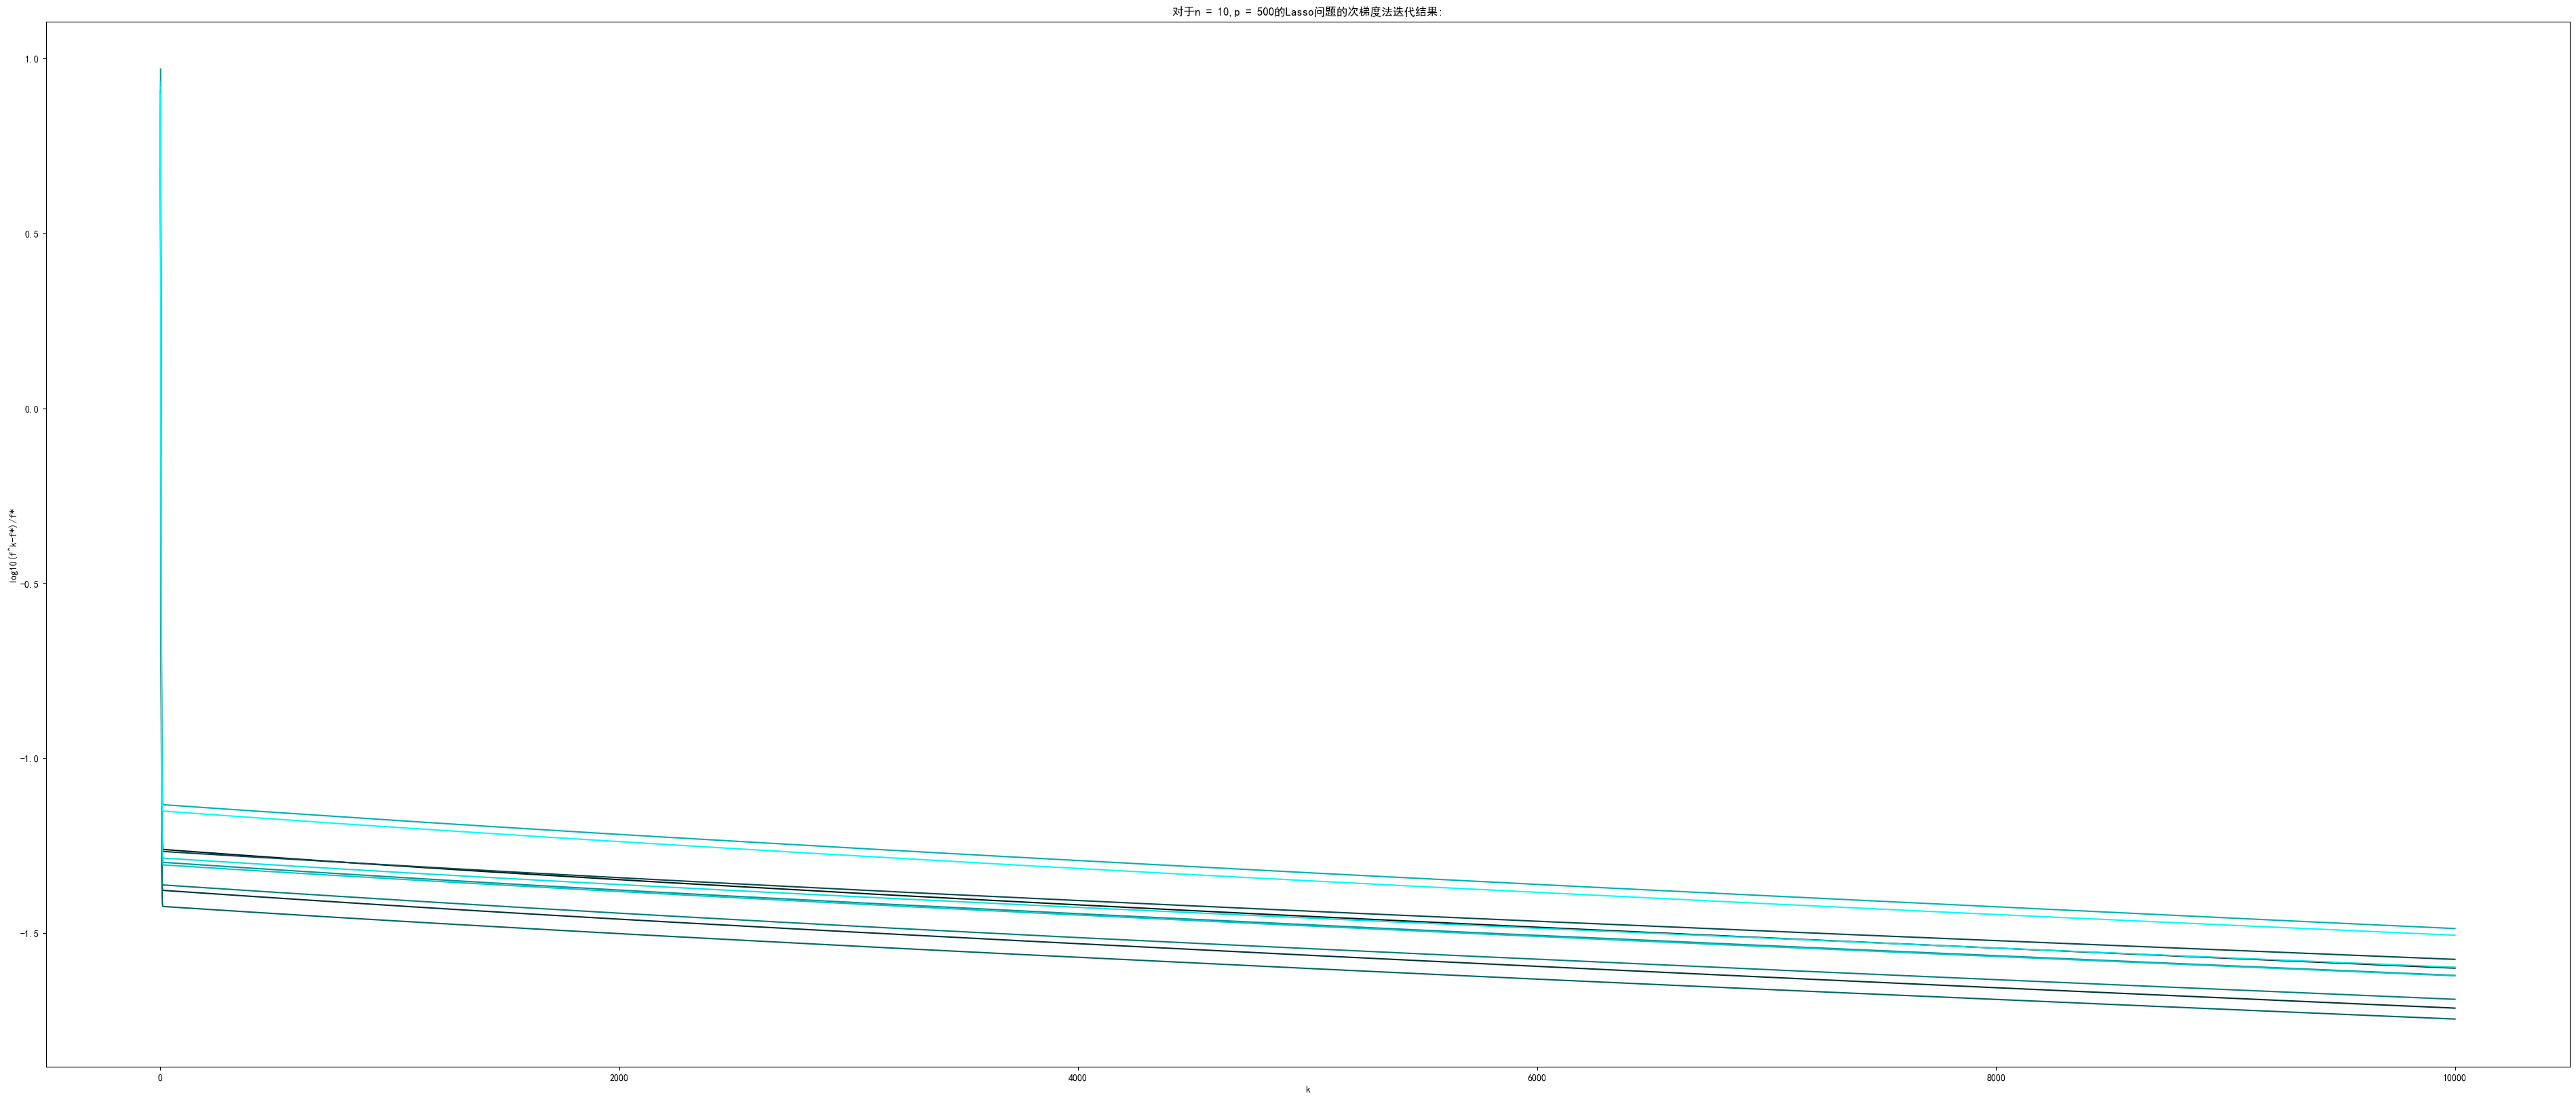

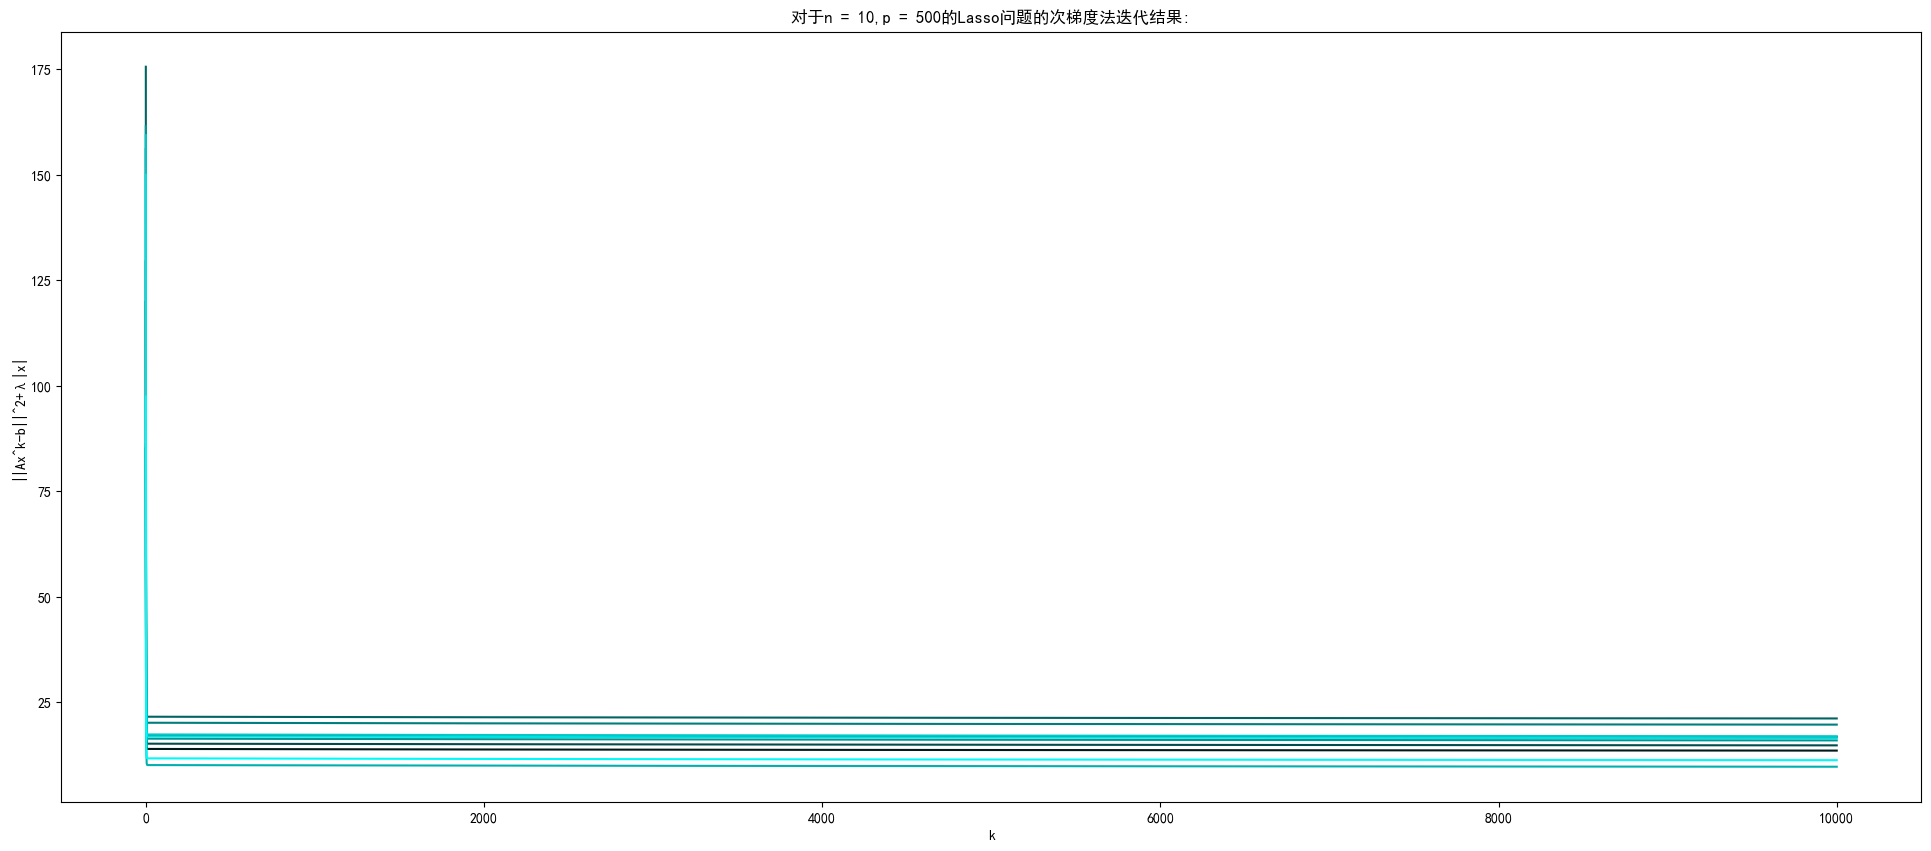

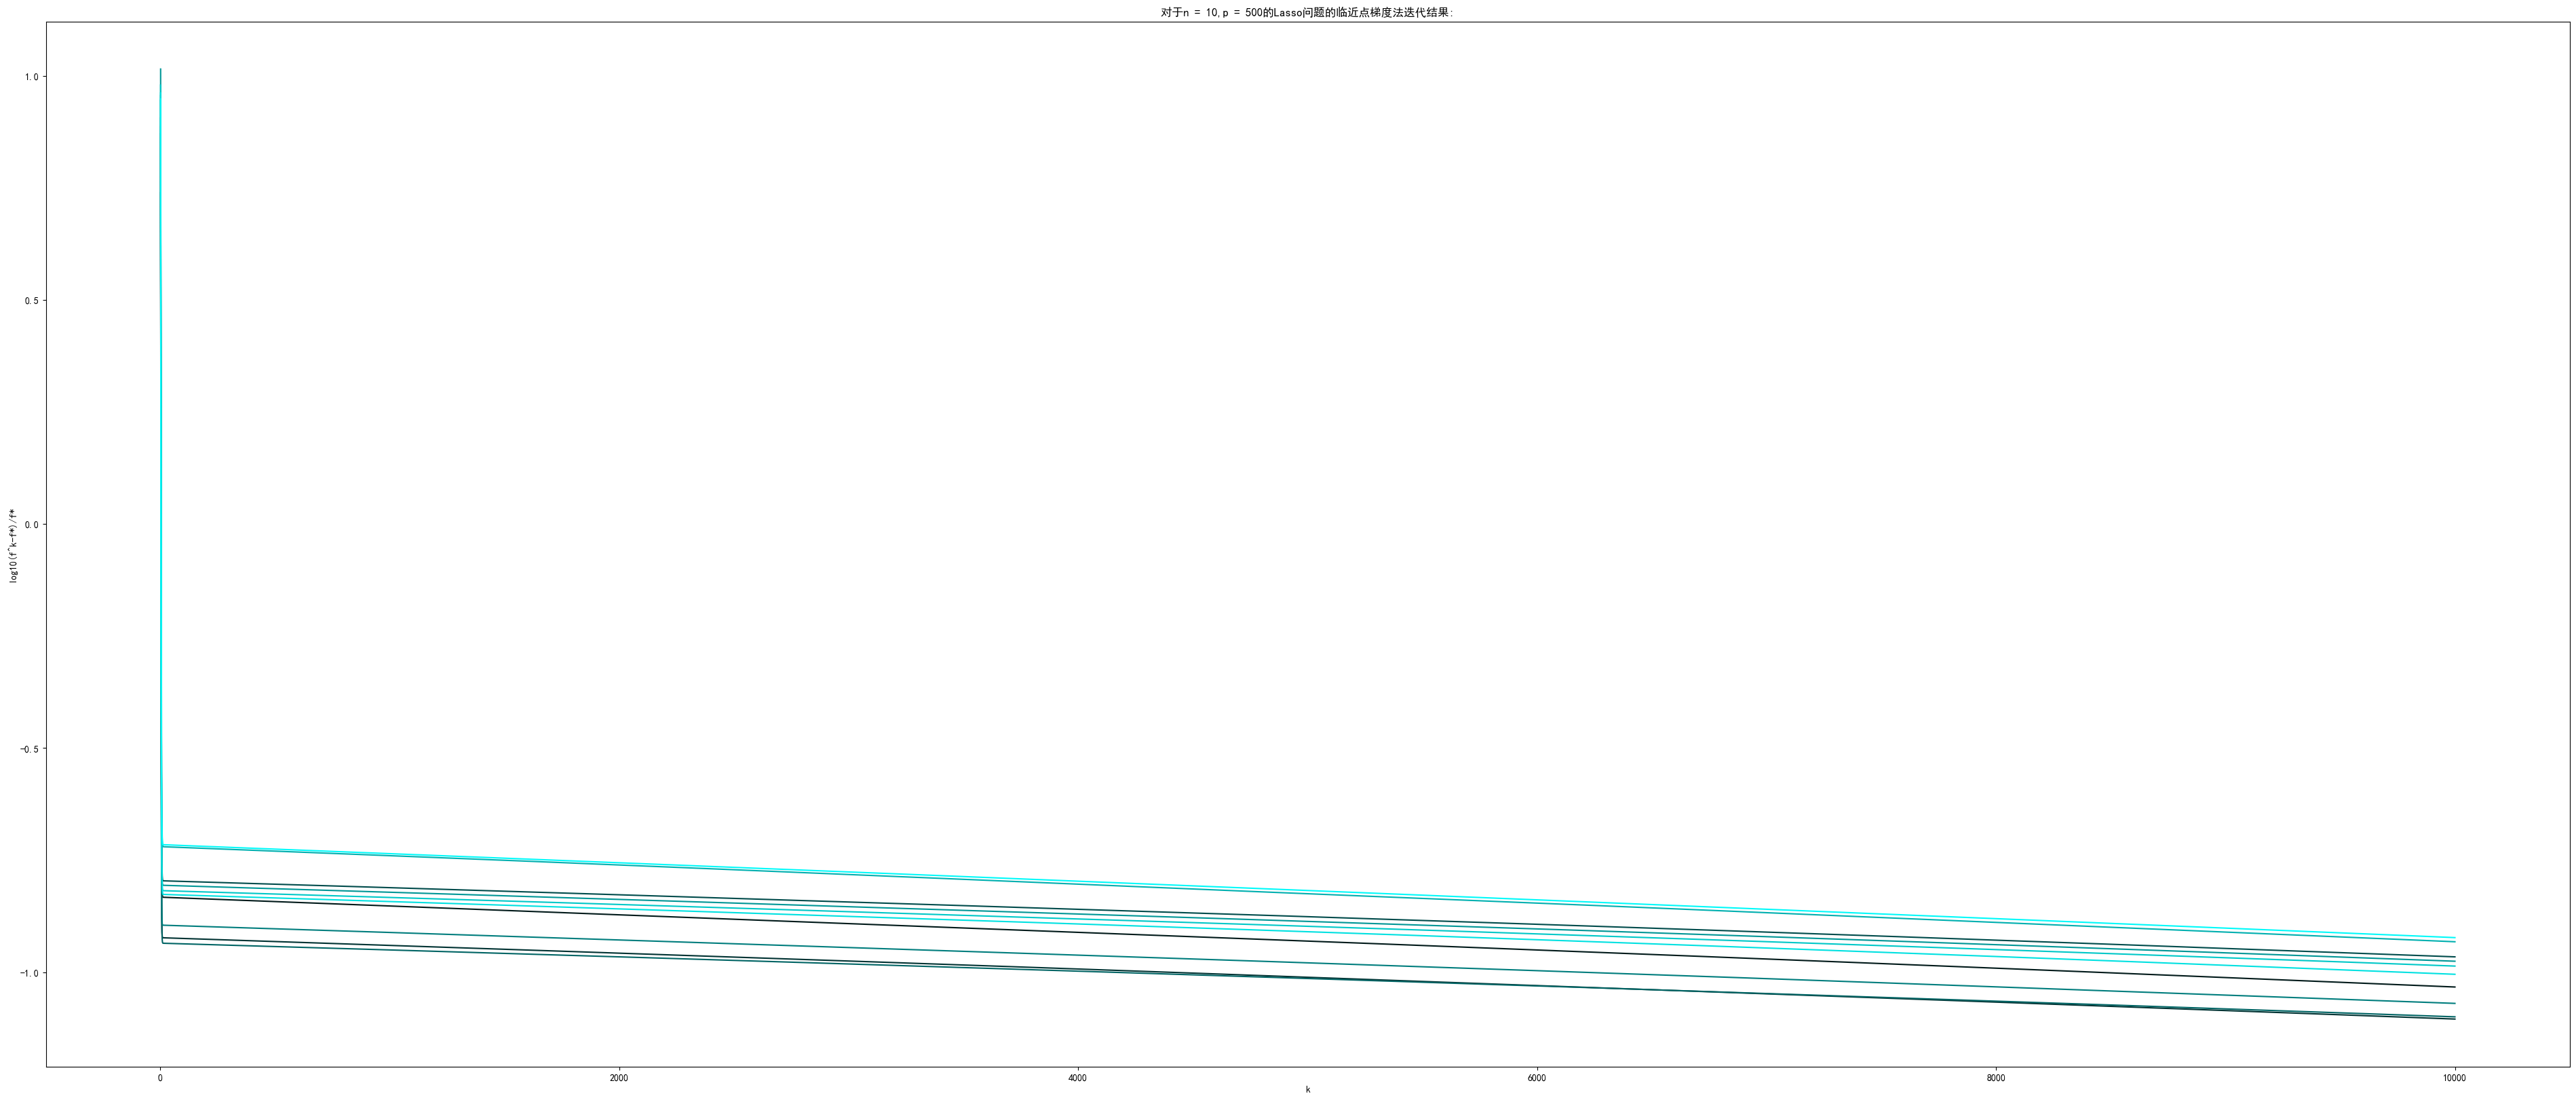

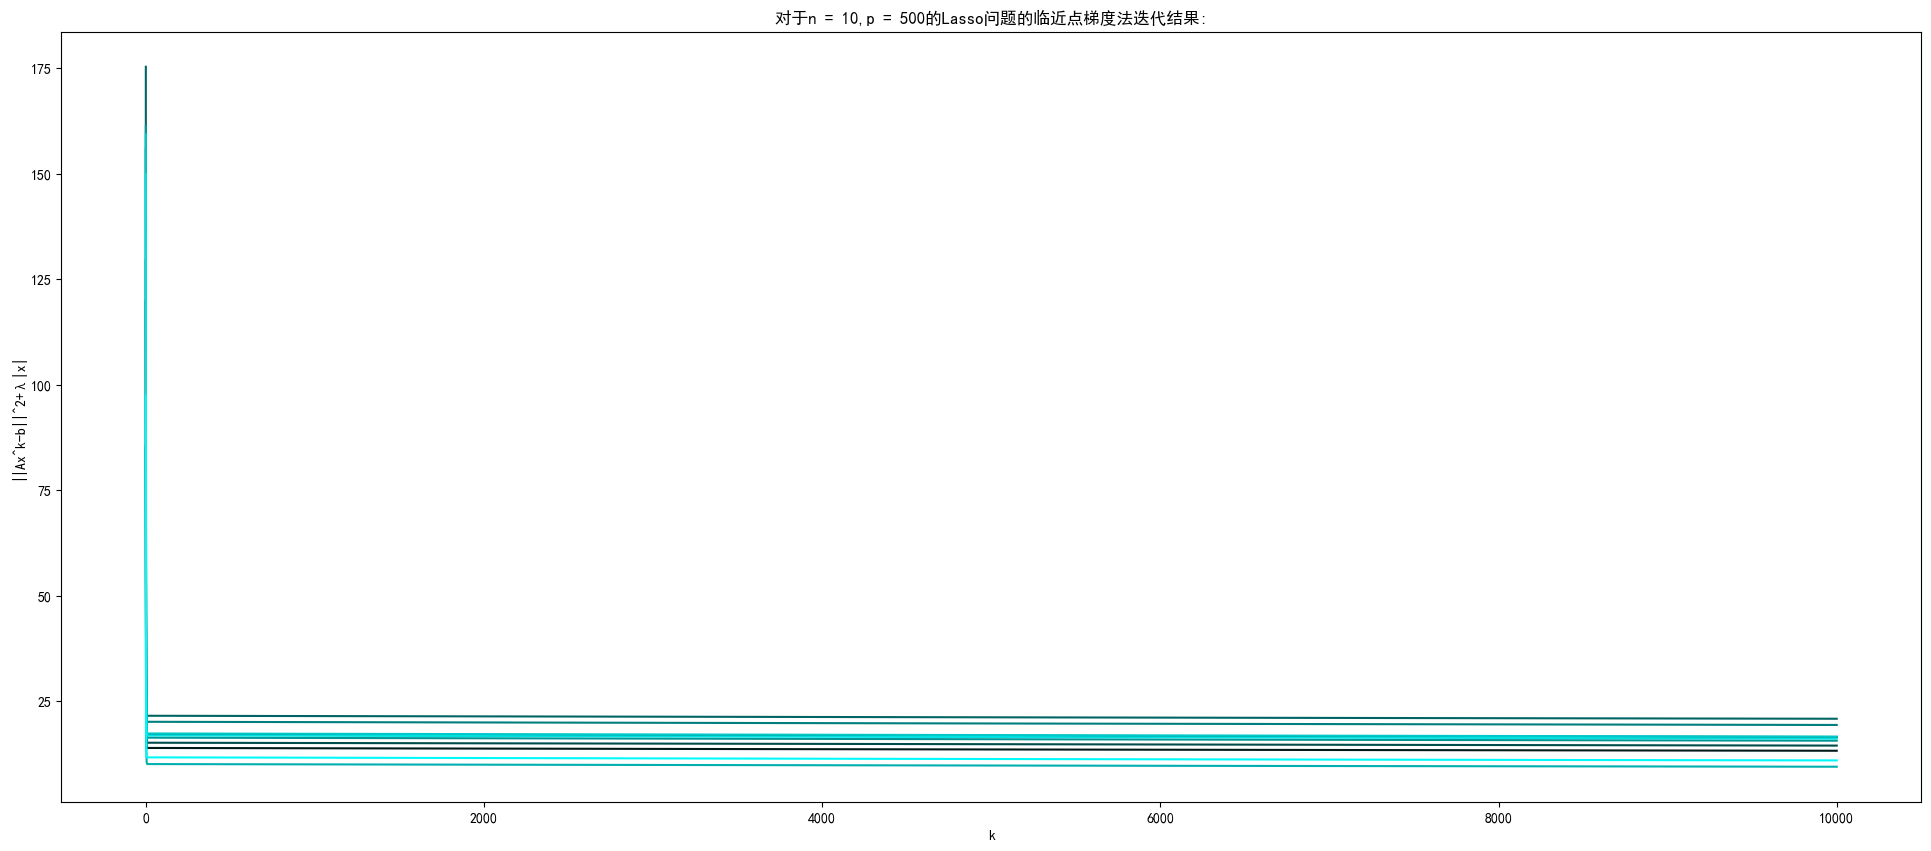

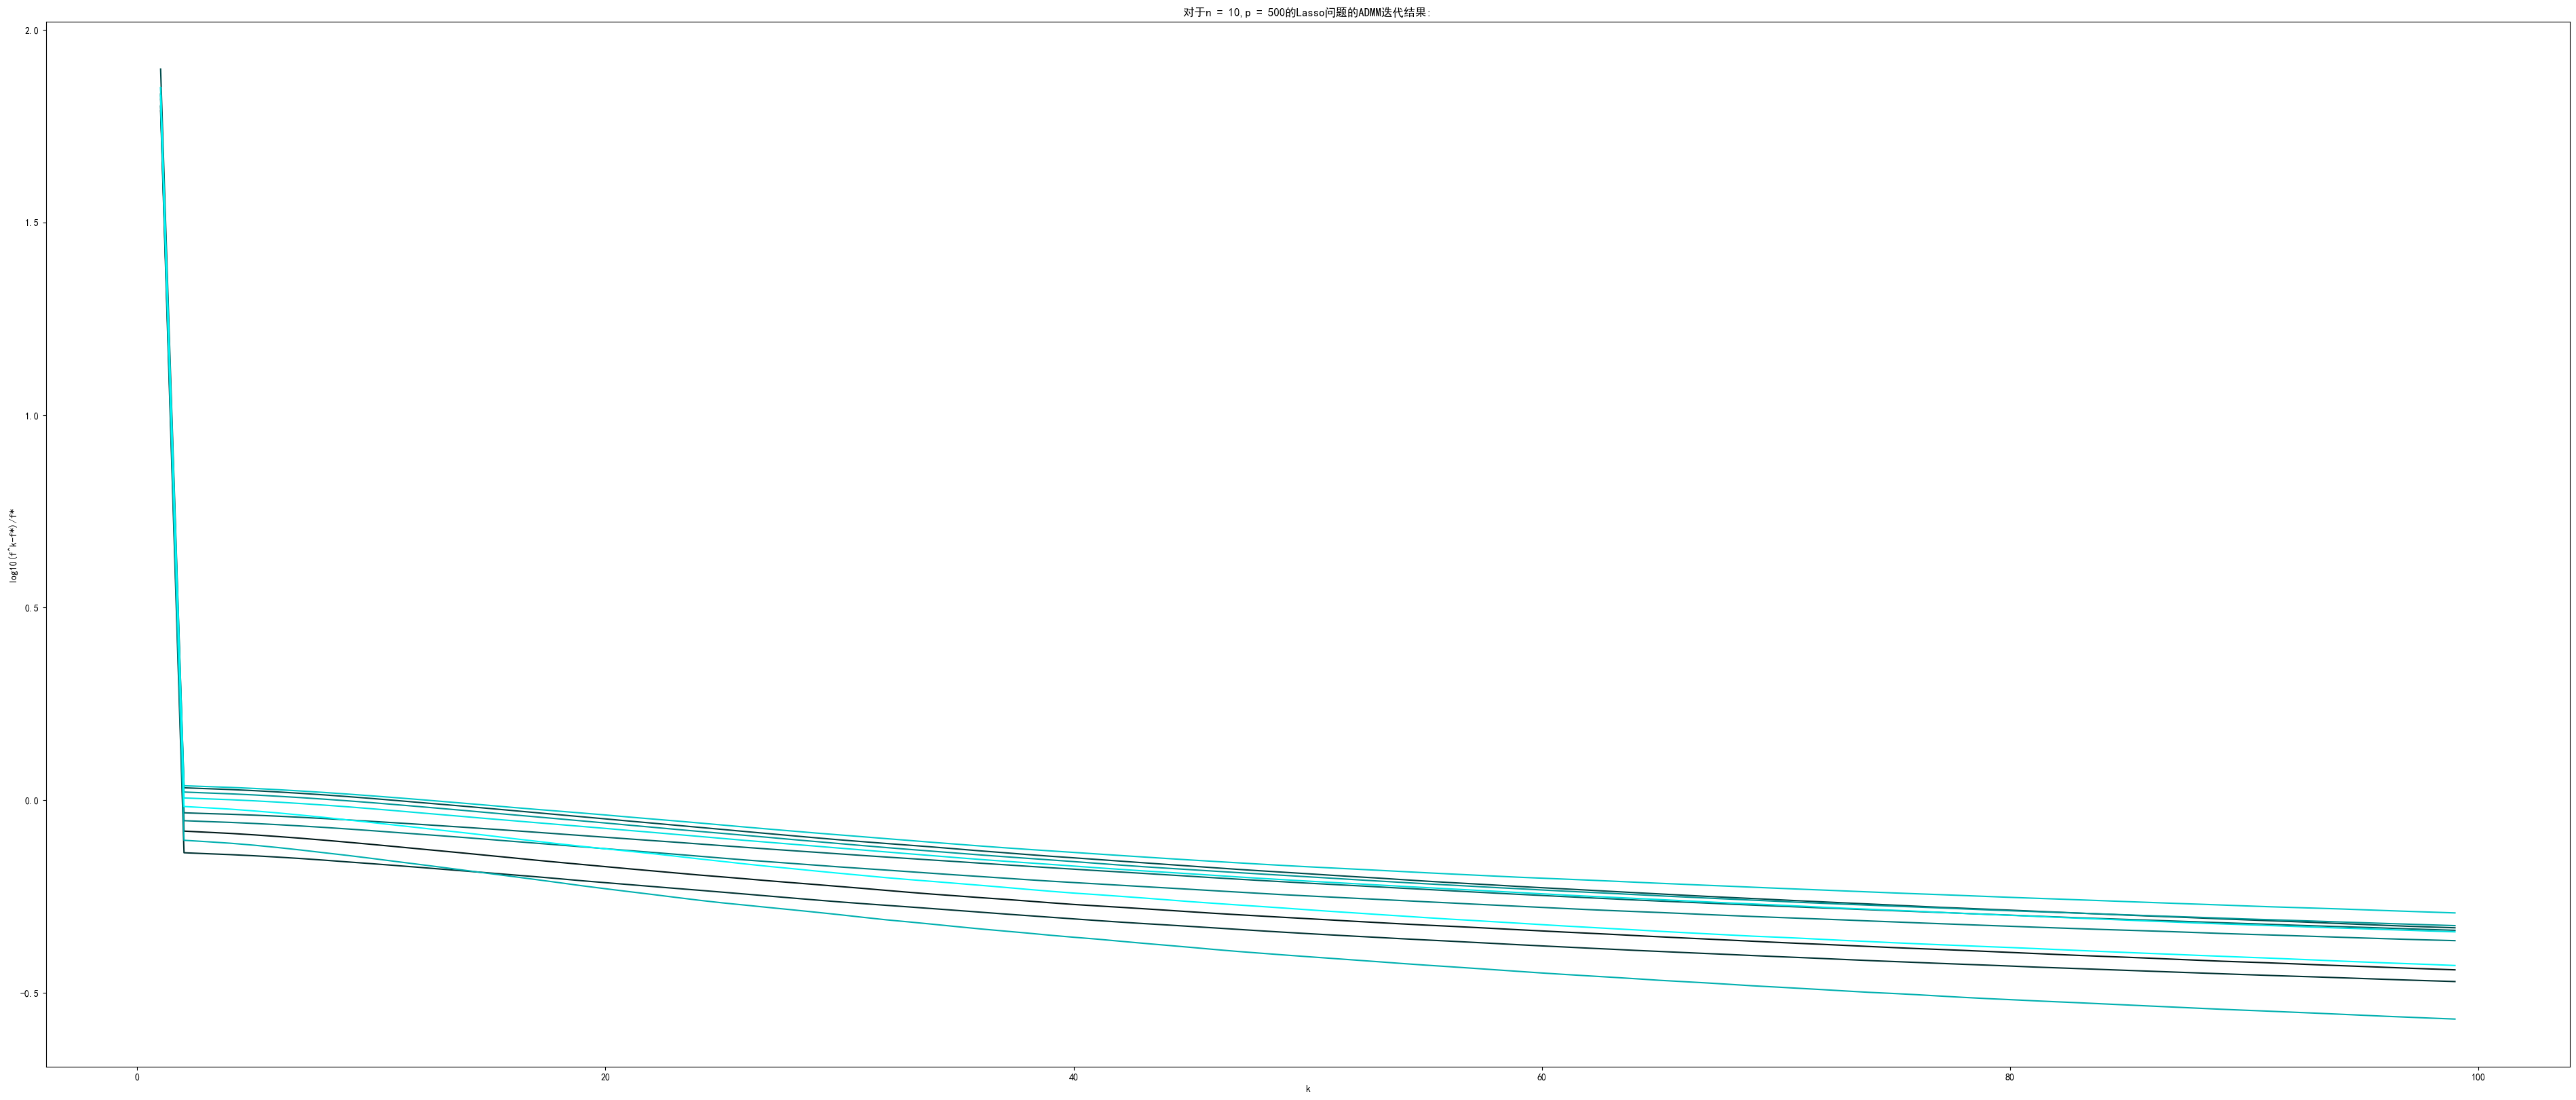

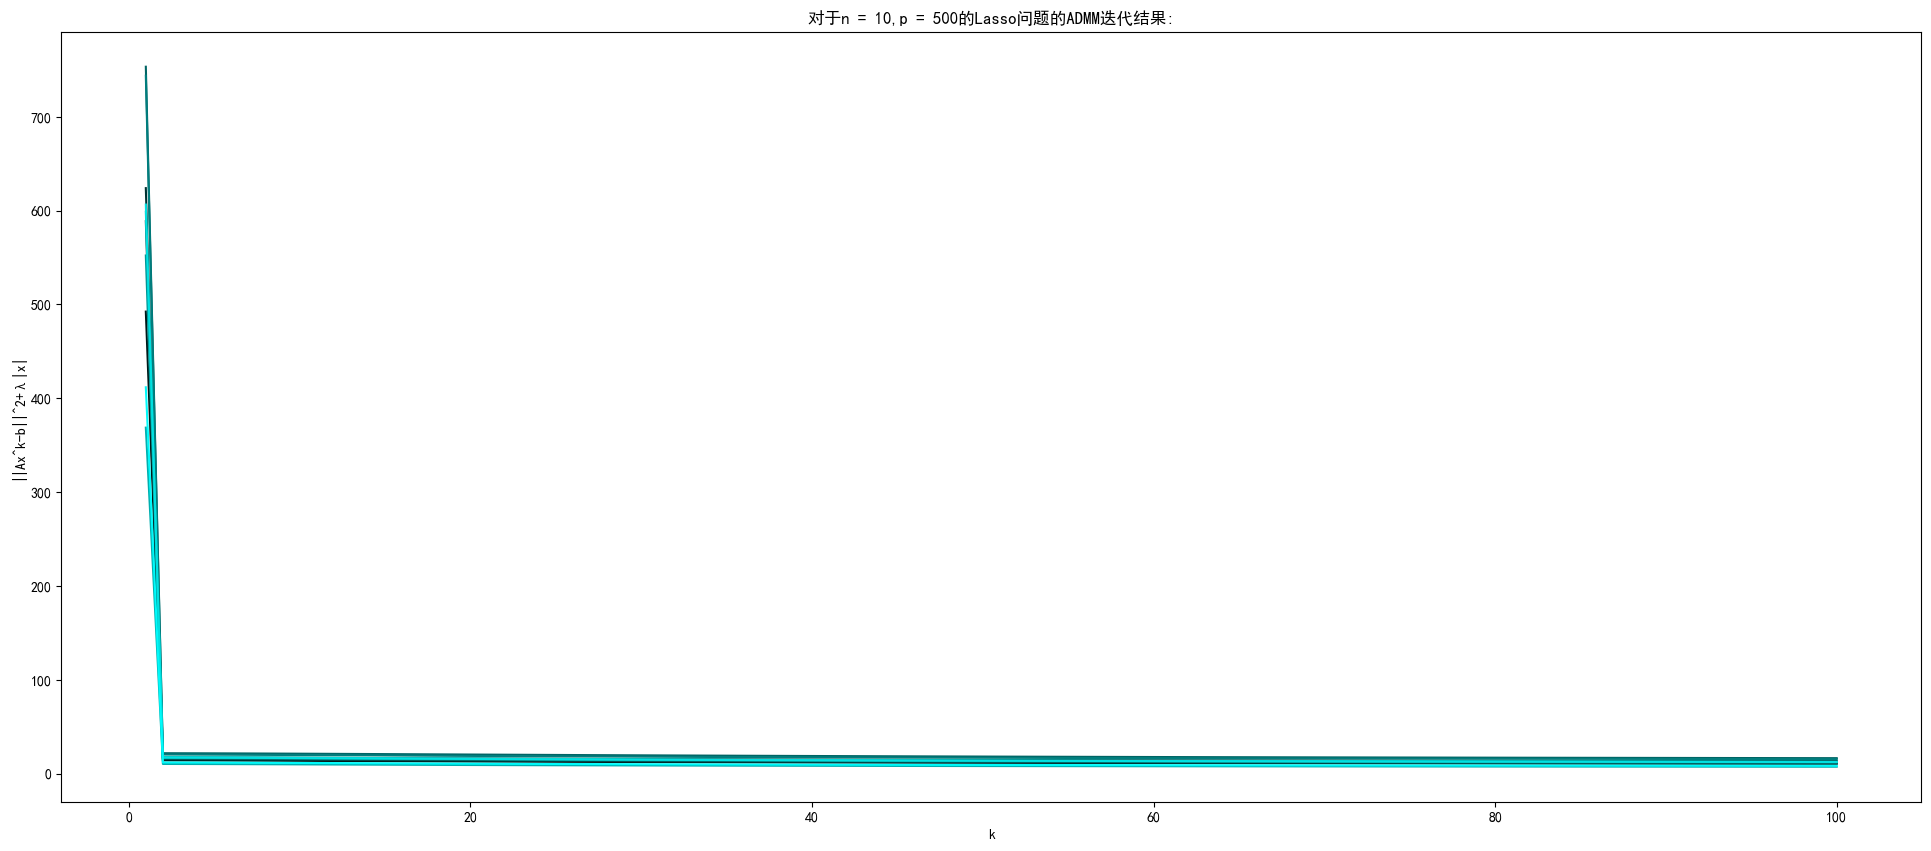

In [3]:

print("图像会在运行结束后一起出现")
for i in [[10,5],[100,5],[10,50],[10,500]]:
    n,p=i[0],i[1]
    A,x,b=QuestionGenerate(n,p)
    Accuracy,Time,F=SubGradMethod(A,b,0.05)
    print("对于n = " + str(n)+",p = " + str(p) + "的Lasso问题的次梯度法迭代结果:")
    plot(Accuracy,Time,F,n,p,"次梯度法")
    Accuracy,Time,F=ProximalGradMethod(A,b,0.05)
    print("对于n = " + str(n)+",p = " + str(p) + "的Lasso问题的临近点梯度法迭代结果:")
    plot(Accuracy,Time,F,n,p,"临近点梯度法")
    Accuracy,Time,F=ADMM(A,b,0.05)
    print("对于n = " + str(n)+",p = " + str(p) + "的Lasso问题的ADMM迭代结果:")
    plotADMM(Accuracy,Time,F,n,p)


In [4]:
np.dot(A[0].T,np.dot(A[0],x[0])-b[0])+0.05*SubGrad1

NameError: name 'SubGrad1' is not defined

In [64]:
def plotADMM(Accuracy,Time,F):
    plt.figure(figsize=(48, 20))
    plt.ylabel("log10(f^k-f*)/f*")
    plt.xlabel("k")
    for i in range(testsize):
        plt.plot(Time[i][:99],Accuracy[i][:99],"#00"+str(hex(25*i+25))[2:]+str(hex(25*i+25))[2:])
    plt.figure(figsize=(24, 10))
    plt.ylabel("||Ax^k-b||^2+λ|x|")
    plt.xlabel("k")
    for i in range(testsize):
        plt.plot(Time[i][:100],F[i][:100],"#00"+str(hex(25*i+25))[2:]+str(hex(25*i+25))[2:])
def plot(Accuracy,Time,F):
    plt.figure(figsize=(48, 20))
    plt.ylabel("log10(f^k-f*)/f*")
    plt.xlabel("k")
    for i in range(testsize):
        plt.plot(Time[i],Accuracy[i],"#00"+str(hex(25*i+25))[2:]+str(hex(25*i+25))[2:])
    plt.figure(figsize=(24, 10))
    plt.ylabel("||Ax^k-b||^2+λ|x|")
    plt.xlabel("k")
    for i in range(testsize):
        plt.plot(Time[i],F[i],"#00"+str(hex(25*i+25))[2:]+str(hex(25*i+25))[2:])

In [83]:
print(Accuracy[0])

[np.float64(1.2422735747498495), np.float64(0.995287477879872), np.float64(0.8827731284748955), np.float64(0.7959048810479291), np.float64(0.7134652396868362), np.float64(0.6328779000015752), np.float64(0.5537523232920735), np.float64(0.4759272356972646), np.float64(0.3992717667676322), np.float64(0.32366950236262865), np.float64(0.24901758061850796), np.float64(0.1752255936138682), np.float64(0.10221390871214385), np.float64(0.02991184905105366), np.float64(-0.041744049575437016), np.float64(-0.11281163271721394), np.float64(-0.18334456224863005), np.float64(-0.2533936079137315), np.float64(-0.32300782088200186), np.float64(-0.3922356180295614), np.float64(-0.4611258061672668), np.float64(-0.529728574927761), np.float64(-0.5980964863644148), np.float64(-0.6662854889633688), np.float64(-0.7343559839775727), np.float64(-0.8023739728938075), np.float64(-0.8704123164966391), np.float64(-0.9385521383751356), np.float64(-1.0068844087028153), np.float64(-1.075511747402182), np.float64(-1.144